---
# **Applied Data Programming (CI7340) - Coursework 2 (Group 8)**
**Group Members**
- Jay Thakur (K2169218)
- Abin Varghese (K2275285)
- Jickson Dijo Mathew (K2258245)
- Alan Vinodh (K2172630)
---
> We are pleased to present a static dashboard showcasing our Applied Data Programming endeavors. The dashboard encompasses a comprehensive display of techniques such as IDA, EDA, Feature Engineering, Descriptive Statistics, Inferential Statistics (including hypothesis testing), and a multitude of visualizations. We trust that you will find the dashboard informative and engaging, as much as we enjoyed curating its contents.

> For your convenience, the live dashboard can be accessed at the following link: [Live Dashboard](https://spartan-119.github.io/SUPPORT2/).

> Kindly note that for optimal visualizations, it is recommended to render this notebook on Google Colab. We have utilized the tabulate library to enhance visual representations, ensuring proper rendering specifically tailored for Google Colab.
---
## **<u>Steps performend</u>**
1. Importing Necessary Liberaries
2. Basic IDA
  * Importing Dataset
  * Basic Data Quality
3. EDA (Exploratory Data Analysis)
  * Descriptive Statistics
  * Data Quality Check
  * Cleaning Data
  * Visualizations
4. Discussion and Interpretation
  * Hypothesis Testing: Chi-Square Test
  * Regression Analysis
  * Demographic Analysis
  * Disease Severity
  * Survival Rates
  * Financial Impact
  * Comorbidity Analysis
  * Physiological Analysis
  * Imapct of Education and Income
5. Conclusions



---
# **Importing Necessary Liberaries**
---

In [ ]:
# database and numeric libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
from scipy.stats import chi2_contingency
from scipy.stats import linregress


#Display all the columns and rows
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
from tabulate import tabulate

#Display all the columns and rows
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# command to ignore warnings during filtering
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive to access data file
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


---
# **Basic IDA**
---

## **2.1** Importing dataset to Dataframe

In [ ]:
# Import file path
path = '/content/drive/MyDrive/University_Assignment_Dataset/support2-1.csv'
abin_path = '/content/drive/MyDrive/MSc Data Science/datasets/support2-1.csv'
# Read data from .csv to dataframe
df = pd.read_csv(path)

# Print sample dataframe
df.head()

ID       age  death     sex  hospdead  slos  d.time            dzgroup  \
0   1  62.84998      0    male         0     5    2029        Lung Cancer   
1   2  60.33899      1  female         1     4       4          Cirrhosis   
2   3  52.74698      1  female         0    17      47          Cirrhosis   
3   4  42.38498      1  female         0     3     133        Lung Cancer   
4   5  79.88495      0  female         0    16    2029  ARF/MOSF w/Sepsis   

              dzclass  num.co   edu      income  scoma  charges  totcst  \
0              Cancer       0  11.0    $11-$25k    0.0   9715.0     NaN   
1  COPD/CHF/Cirrhosis       2  12.0    $11-$25k   44.0  34496.0     NaN   
2  COPD/CHF/Cirrhosis       2  12.0  under $11k    0.0  41094.0     NaN   
3              Cancer       2  11.0  under $11k    0.0   3075.0     NaN   
4            ARF/MOSF       1   NaN         NaN   26.0  50127.0     NaN   

   totmcst    avtisst   race        sps   aps    surv2m    surv6m  hday  \
0      NaN   7.000000  other  33.898438  20.0  0.262939  0.036995     1   
1      NaN  29.000000  white  52.695312  74.0  0.001000  0.000000     3   
2      NaN  13.000000  white  20.500000  45.0  0.790894  0.664917     4   
3      NaN   7.000000  white  20.097656  19.0  0.698975  0.411987     1   
4      NaN  18.666656  white  23.500000  30.0  0.634888  0.532959     3   

   diabetes  dementia          ca  prg2m  prg6m     dnr  dnrday  meanbp  \
0         0         0  metastatic   0.50   0.25  no dnr     5.0    97.0   
1         0         0          no   0.00   0.00     NaN     NaN    43.0   
2         0         0          no   0.75   0.50  no dnr    17.0    70.0   
3         0         0  metastatic   0.90   0.50  no dnr     3.0    75.0   
4         0         0          no   0.90   0.90  no dnr    16.0    59.0   

        wblc    hrt  resp      temp       pafi       alb      bili      crea  \
0   6.000000   69.0  22.0  36.00000  388.00000  1.799805  0.199982  1.199951   
1  17.097656  112.0  34.0  34.59375   98.00000       NaN       NaN  5.500000   
2   8.500000   88.0  28.0  37.39844  231.65625       NaN  2.199707  2.000000   
3   9.099609   88.0  32.0  35.00000        NaN       NaN       NaN  0.799927   
4  13.500000  112.0  20.0  37.89844  173.31250       NaN       NaN  0.799927   

     sod        ph  glucose  bun  urine  adlp  adls                sfdm2  \
0  141.0  7.459961      NaN  NaN    NaN   7.0   7.0                  NaN   
1  132.0  7.250000      NaN  NaN    NaN   NaN   1.0     <2 mo. follow-up   
2  134.0  7.459961      NaN  NaN    NaN   1.0   0.0     <2 mo. follow-up   
3  139.0       NaN      NaN  NaN    NaN   0.0   0.0  no(M2 and SIP pres)   
4  143.0  7.509766      NaN  NaN    NaN   NaN   2.0  no(M2 and SIP pres)   

   adlsc  
0    7.0  
1    1.0  
2    0.0  
3    0.0  
4    2.0

## **2.2** Basic Data Quality
* References
  * Reference for `describe()`: https://www.w3resource.com/pandas/dataframe/dataframe-describe.php
  * Reference for `tabulate` libaray: https://pypi.org/project/tabulate/

In [ ]:
def dataUnderstanding(data):
  # Number of the rows and columns
  rows, columns = df.shape
  print('-' * 50)
  print(f"Number of Rows:{rows} | Number of Columns:{columns}")
  print('-' * 50)
  print()

  # List of columns
  columns_df = pd.DataFrame(df.columns, columns=["Column Names"])
  print("List of Features in the dataset:")
  print(tabulate(columns_df, headers='keys', tablefmt='psql', showindex=False))
  print('-' * 50)
  print()

  # Print Data type
  print("Summarized basic information:\n")
  df.info()
  print('-' * 50)
  print()

  # printing all the numerical datatype columns
  numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
  print(f"Printing all the numerical columns --> {numerical_columns}")
  print()
  # printing all the object datatype columns
  object_columns = df.select_dtypes(include=['object']).columns.tolist()
  print(f"Printing all the Object columns --> {object_columns}")
  print('-' * 50)
  print()

  # finding the missing values
  print(f"Finding the number of missing values in all the columns -->\n")
  print(df.isna().sum())
  print('-' * 50)


dataUnderstanding(df)

--------------------------------------------------
Number of Rows:9105 | Number of Columns:48
--------------------------------------------------

List of Features in the dataset:
+----------------+
| Column Names   |
|----------------|
| ID             |
| age            |
| death          |
| sex            |
| hospdead       |
| slos           |
| d.time         |
| dzgroup        |
| dzclass        |
| num.co         |
| edu            |
| income         |
| scoma          |
| charges        |
| totcst         |
| totmcst        |
| avtisst        |
| race           |
| sps            |
| aps            |
| surv2m         |
| surv6m         |
| hday           |
| diabetes       |
| dementia       |
| ca             |
| prg2m          |
| prg6m          |
| dnr            |
| dnrday         |
| meanbp         |
| wblc           |
| hrt            |
| resp           |
| temp           |
| pafi           |
| alb            |
| bili           |
| crea           |
| sod            |
| ph

In [ ]:
# Metadata of Data
path = '/content/drive/MyDrive/University_Assignment_Dataset/MetaData.xlsx'
metaData_path = '/content/drive/MyDrive/MSc Data Science/datasets/MetaData.xlsx'
metaData = pd.read_excel(path)
tabulateMetaData = tabulate(metaData, headers='keys',tablefmt='pretty', colalign='left')
print(tabulateMetaData)

+----+---------------+---------+-------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|    | Variable Name |    Role |        Type |                                                                                                                                                                                                                                                                   Description                                                                                          

---
# **EDA (Exploratory Data Analysis)**
---

## **3.1** Descriptive Statistics
* References
  * Reference for `describe()`: https://www.w3resource.com/pandas/dataframe/dataframe-describe.php
  * Reference for `tabulate` libaray: https://pypi.org/project/tabulate/

In [ ]:
def dataUnderstanding(data):
  # Statistical Summary
  def generate_statistical_summary(df, data_type):
      if data_type == 'numeric':
          summary = df.describe(exclude=['object','datetime64'])
      elif data_type == 'object':
          summary = df.describe(include=['object'])
      else:
          summary = "Invalid data type specified"
      return summary

  # For numeric data
  numeric_summary = generate_statistical_summary(df, 'numeric')
  # Counting the number of unique values for each column
  unique_counts = df.nunique()
  # Combining descriptive statistics with unique value counts
  num_desc_stats_with_unique = numeric_summary.append(unique_counts.rename('unique'))
  print("Statistical Summary for Numeric Data:")
  print(tabulate(num_desc_stats_with_unique, headers='keys', tablefmt='pretty'))

  # For object data
  object_summary = generate_statistical_summary(df, 'object')
  print("\nStatistical Summary for Object Data:")
  print(tabulate(object_summary, headers='keys', tablefmt='pretty'))

dataUnderstanding(df)

Statistical Summary for Numeric Data:
+--------+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+---------------------+--------------------+-------------------+---------------------+----------------------+---------------------+---------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----+---------+---------+--------+------+-----+-----+-------+
|        |        ID         |        age         

In [ ]:
def calculate_missing_values(df):
  # Total percent of overall data
  total_percentage_missing = (
      (
          (df.isnull() | df.isna() | (df == '')).sum().sum()
          / (df.size)
      ) * 100
  ).round(2)
  print(f"The total percentage of missing values is: {total_percentage_missing}% \n")

  # Count of missing values
  missing_count = (
      (df.isnull() | df.isna()).sum() +
      (df == '').sum()
  )

  # Percentage of missing values
  missing_percentage = (
      ((df.isnull() | df.isna()).sum() +
      (df == '').sum()) * 100 / len(df)
  ).round(2)

  # Checking for potential outliers in numerical columns
  # We will use IQR method for outlier detection
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  outlier_counts = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

  # Create a DataFrame to store the results
  statistical_df = pd.DataFrame({
      "Missing": missing_count,
      "% Missing": missing_percentage,
      "Outliers": outlier_counts
  })

  statistical_df['% Outliers'] = round((statistical_df['Outliers'] / len(df)) * 100, 2)

  # Print the combined table
  print("Combined Summary Table:")
  print(tabulate(statistical_df.sort_values(by='% Missing', ascending=False), headers='keys', tablefmt='rst'))

calculate_missing_values(df)

The total percentage of missing values is: 10.78% 

Combined Summary Table:
========  =========  ===========  ==========  ============
..          Missing    % Missing    Outliers    % Outliers
========  =========  ===========  ==========  ============
adlp           5641        61.95         149          1.64
urine          4862        53.4           92          1.01
glucose        4500        49.42         272          2.99
bun            4352        47.8          267          2.93
totmcst        3475        38.17         495          5.44
alb            3372        37.03          15          0.16
income         2982        32.75           0          0
adls           2867        31.49           0          0
bili           2601        28.57         926         10.17
pafi           2325        25.54          90          0.99
ph             2284        25.09         260          2.86
prg2m          1649        18.11           0          0
edu            1634        17.95         199    

#### **Insights**
1.	**Data Completeness and Missing Values:**
  * The dataset has a considerable amount of missing data, with the total percentage of missing values being 10.78%. Certain columns like `adlp`, `urine`, `glucose`, and `bun` have more than 45% data missing. This high level of missing data can impact the reliability and accuracy of any analysis performed on the dataset.
2.	**Variable Types and Diversity:**
  * The dataset includes a mix of numerical (both integer and float) and categorical (object type) data. Variables like `age`, `scoma`, and `charges` are continuous, whereas `sex`, `dzgroup`, and `race` are categorical. The diversity in data types indicates a rich dataset that can be used for varied analyses.
3.	**Statistical Summary of Numeric Data:**
  * The numeric variables exhibit a wide range of values. For example, `age` ranges from approximately 18 to 102 years, indicating a diverse age group in the sample. Variables like `charges` and `totcst` (total cost) have a very high standard deviation, suggesting significant variability in hospital charges and total costs among the patients.
4.	**Outliers in the Data:**
  * Several columns contain outliers, which are values significantly different from others in the dataset. For instance, `scoma` (coma score) has 21.47% of its values as outliers, and `charges` has 10.02% outliers. These outliers could be due to extreme cases or errors in data collection.
5.	**Categorical Data Overview:**
  * The categorical data shows a variety of top categories. For example, the most frequent `sex` is male (56.3%), the most common disease group (`dzgroup`) is ARF/MOSF w/Sepsis, and the majority of patients are classified as white in race. This information can be crucial for understanding the demographics of the dataset.
6.	**Hospital-Related Information:**
  * Variables like `hospdead` (hospital death), `slos` (length of stay), and `hday` (hospital day) provide insights into the hospitalization aspects. The `slos` variable, for example, ranges from 3 to 343 days, indicating varied lengths of hospital stays.
7.	**Health Conditions and Outcomes:**
  * The dataset includes several variables related to patients` health conditions (like `diabetes`, `dementia`) and outcomes (`surv2m` - survival after 2 months, `hospdead`). The presence of such variables suggests the dataset can be used for studies on health outcomes and their predictors.
8.	**Missing Data and Its Impact:**
  * The significant amount of missing data, especially in variables like `adlp` and `urine`, needs to be addressed before conducting any robust statistical analysis. Imputation techniques or exclusion of certain variables might be necessary depending on the research question.

## **3.2** Data Quality Check

### **3.2.1** Visualizing Outlier

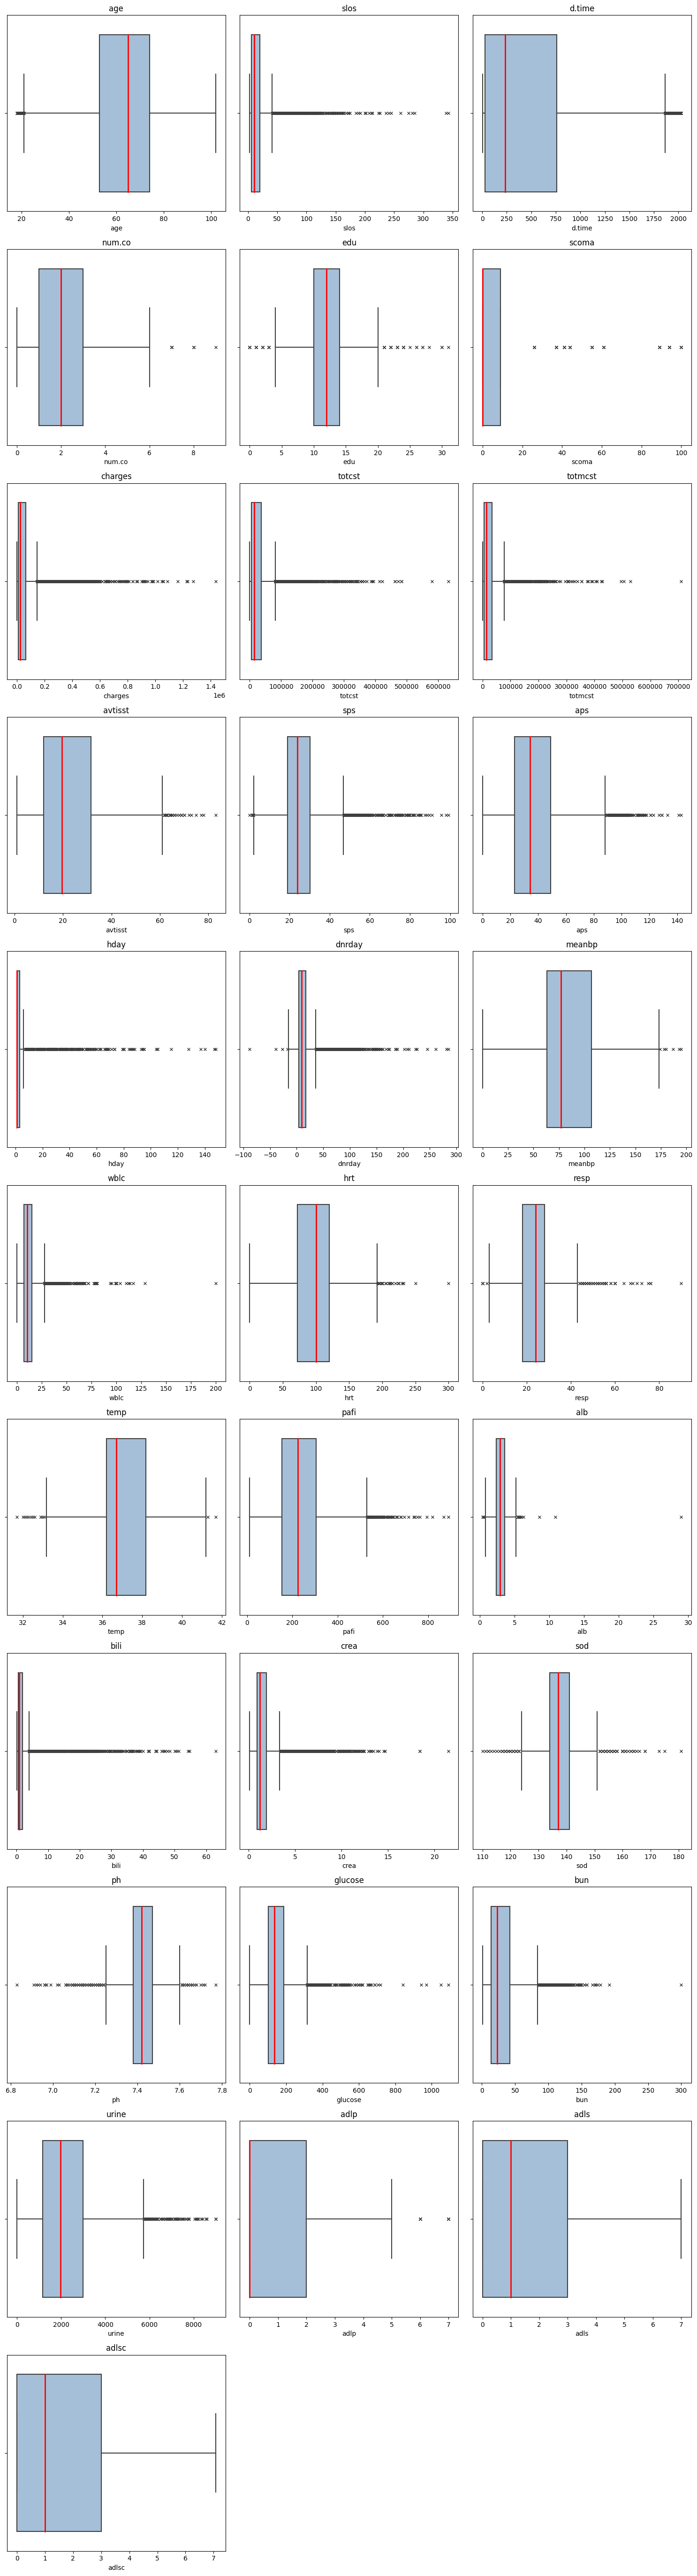

In [ ]:
# Selecting only the numerical columns
df_numerical = df.select_dtypes(include=['float64', 'int64'])

# Drop ID column
df_numerical = df_numerical.drop('ID', axis=1)

# Filtering out columns where the maximum value is 1 or less
df_numerical = df_numerical.loc[:, df_numerical.max() > 1]

# Determining the number of rows and columns for subplots
n_cols = 3
n_rows = (len(df_numerical.columns) + n_cols - 1) // n_cols

# Creating the subplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))
for i, column in enumerate(df_numerical.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df_numerical[column], flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, .5)}, medianprops={"color": "r", "linewidth": 2})
    plt.title(column)

plt.tight_layout()
plt.show()

#### **Insights**
1. **Demographic and Clinical Diversity**:
  * The distribution of demographic variables, notably `age` and `edu`, indicates a patient cohort with a broad spectrum of backgrounds. Variability in clinical metrics such as `scoma` and `num.co` points to a wide array of health statuses and comorbidities, signifying the diverse clinical challenges and healthcare needs presented by the study population.

2. **Patterns in Healthcare Engagement and Patient Trajectories**:
  * Data related to healthcare service usage and patient trajectories, exemplified by `slos` and `d.time`, exhibit considerable dispersion and the occurrence of statistical outliers. These outliers, suggestive of prolonged hospitalization and extensive follow-up periods, highlight the intricate nature of patient care pathways encountered across the participating healthcare institutions.

3. **Fiscal Aspects of Medical Care Provision**:
  * An analysis of the economic facets of medical care provision, as encapsulated by `charges`, `totcst`, and `totmcst`, uncovers a pronounced right-skewed distribution. The concentration of data points toward the lower fiscal range, coupled with the presence of outlier values, hints at a subset of clinical episodes associated with elevated financial implications, which may be attributed to heightened levels of care complexity and resource deployment.

4. **Physiological and Biochemical Profile Variations**:
  * The spread of vital statistics and biochemical markers, including `meanbp`, `wblc`, `hrt`, `resp`, `temp`, and a suite of laboratory tests such as `pafi`, `alb`, `bili`, `crea`, `sod`, `ph`, `glucose`, `bun`, and `urine`, encompasses a range with notable outliers at both ends. These deviations from the central tendency could signify episodes of critical health perturbations or anomalies in data recording, necessitating additional scrutiny.

5. **Assessment of Functionality and Survival Prognosis**:
  * Metrics assessing patient functionality and survival forecasts, such as `adlp`, `adls`, `adlsc`, and `sfdm2`, manifest a gamut of values, with outliers suggesting a spectrum of disability levels and predictive uncertainties within the patient ensemble. This variability emphasizes the need for individualized care strategies and reinforces the complexity of prognostication in a clinical context.

### **3.2.2** Understanding Data Distribution

#### **3.2.2.1** Data Distribution of Numerical Features

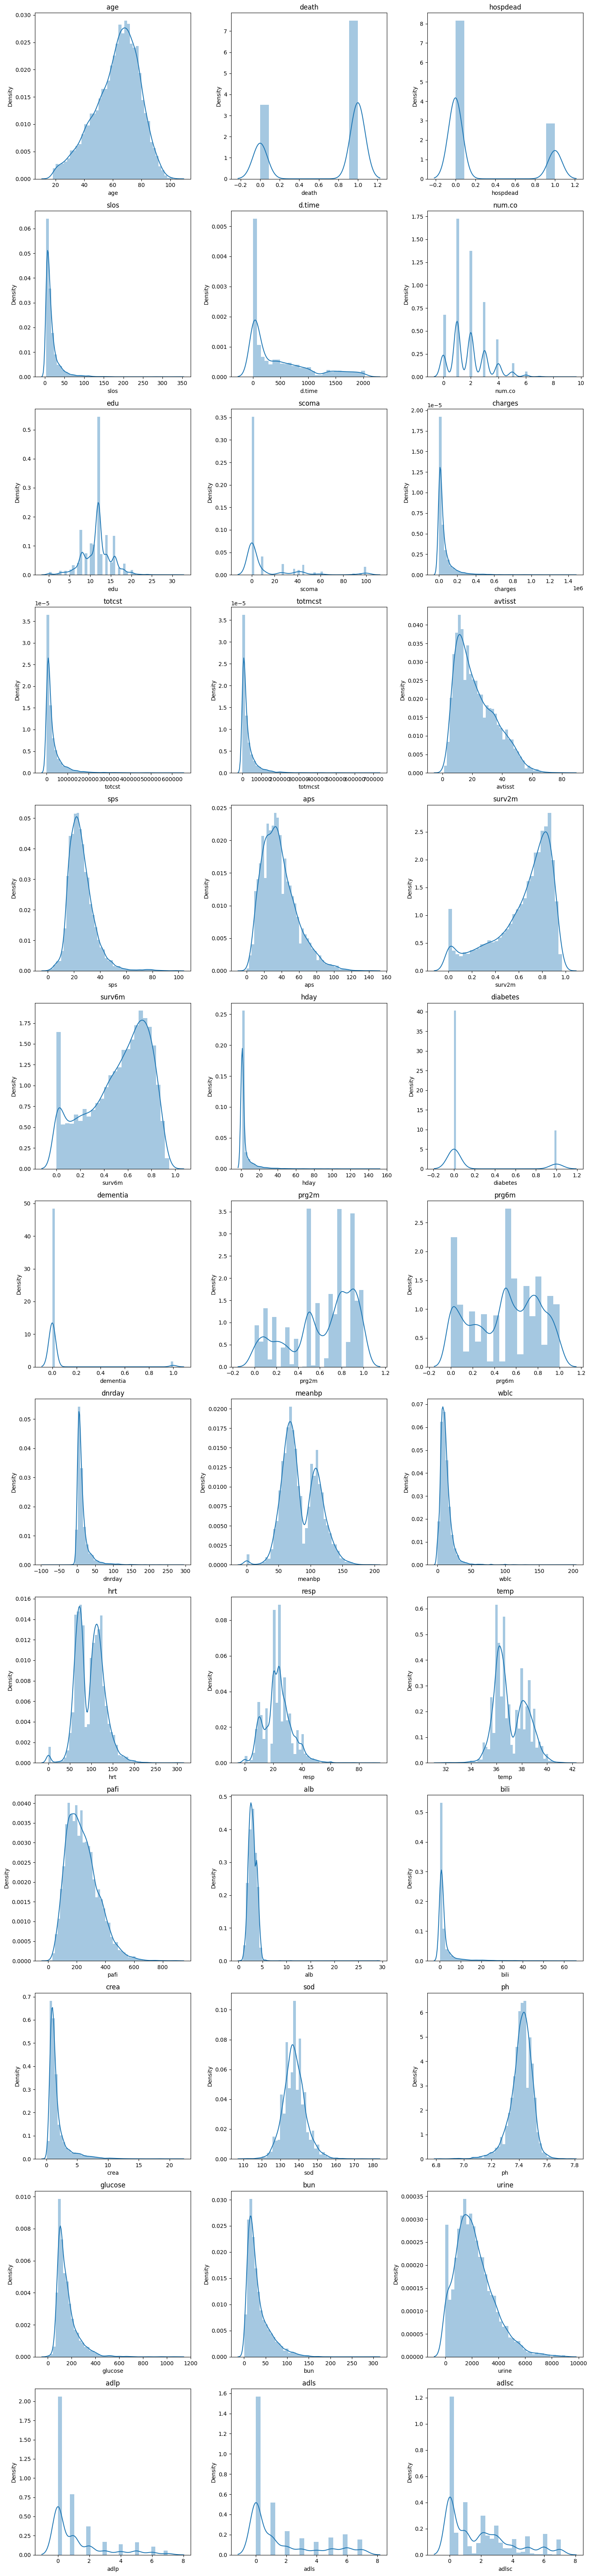

In [ ]:
# Selecting only the numerical columns
df_numerical = df.select_dtypes(include=['float64', 'int64'])

# Drop ID column
df_numerical = df_numerical.drop('ID', axis=1)

# Determining the number of rows and columns for subplots
n_cols = 3
n_rows = (len(df_numerical.columns) + n_cols - 1) // n_cols

# Creating the subplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))
for i, column in enumerate(df_numerical.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.distplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

##### **Insights**
1. **Distribution Shapes:**
  * Many features exhibit non-normal distributions. Some, like `age`, appear to be normally distributed, while others show right-skewness (`slos`, `d.time`, `charges`, `totcst`, `totmcst`, `avtisst`) or left-skewness (`death`, `hospdead`). These skewed distributions indicate that a majority of data points are concentrated on one side of the scale, with a long tail extending in one direction.

2. **Central Tendency:**
  * The peaks of the kernel density plots suggest the mode of the data, which, in skewed distributions, differs from the mean. For symmetric distributions, the mode, median, and mean may coincide.

3. **Spread and Variability:**
  * The width of the histograms and the spread of the kernel density plots suggest variability within the data. A wider distribution indicates greater variability, as seen in features such as `slos`, `charges`, and `totcst`.

4. **Potential Outliers:**
  * Sharp spikes or long tails in the density plots suggest the presence of outliers. For instance, `totcst` and `charges` have long tails, which could be indicative of extreme values, possibly related to unusual or complex cases.

5. **Clinical and Cost-Related Insights:**
  * The distributions of cost-related variables (`charges`, `totcst`, `totmcst`) and clinical scores (`aps`, `sps`, `scoma`) reveal significant right skewness, suggesting a minority of patients incur high costs or have severe clinical scores. This may reflect intensive resource utilization for more critical cases.

6. **Physiological Parameters:**
  * The distributions of physiological parameters (`meanbp`, `wblc`, `hrt`, `resp`, `temp`) tend to be more centralized, indicating a degree of homogeneity in these measurements across the patient population, with some notable deviations from the central values.

7. **Laboratory Measurements:**
  * Similar to physiological parameters, laboratory measurements (`pafi`, `alb`, `bili`, `crea`, `sod`, `ph`, `glucose`, `bun`, `urine`) exhibit central tendencies with varying degrees of skewness, suggesting a range of values consistent with a hospital patient population.

8. **Functionality Scores:**
  * Features like `adlp`, `adls`, and `adlsc`, which measure the Activities of Daily Living, show a distribution that might be used to assess patient independence and predict outcomes.**bold text**

#### **3.2.2.2** Data Distribution of Object Features


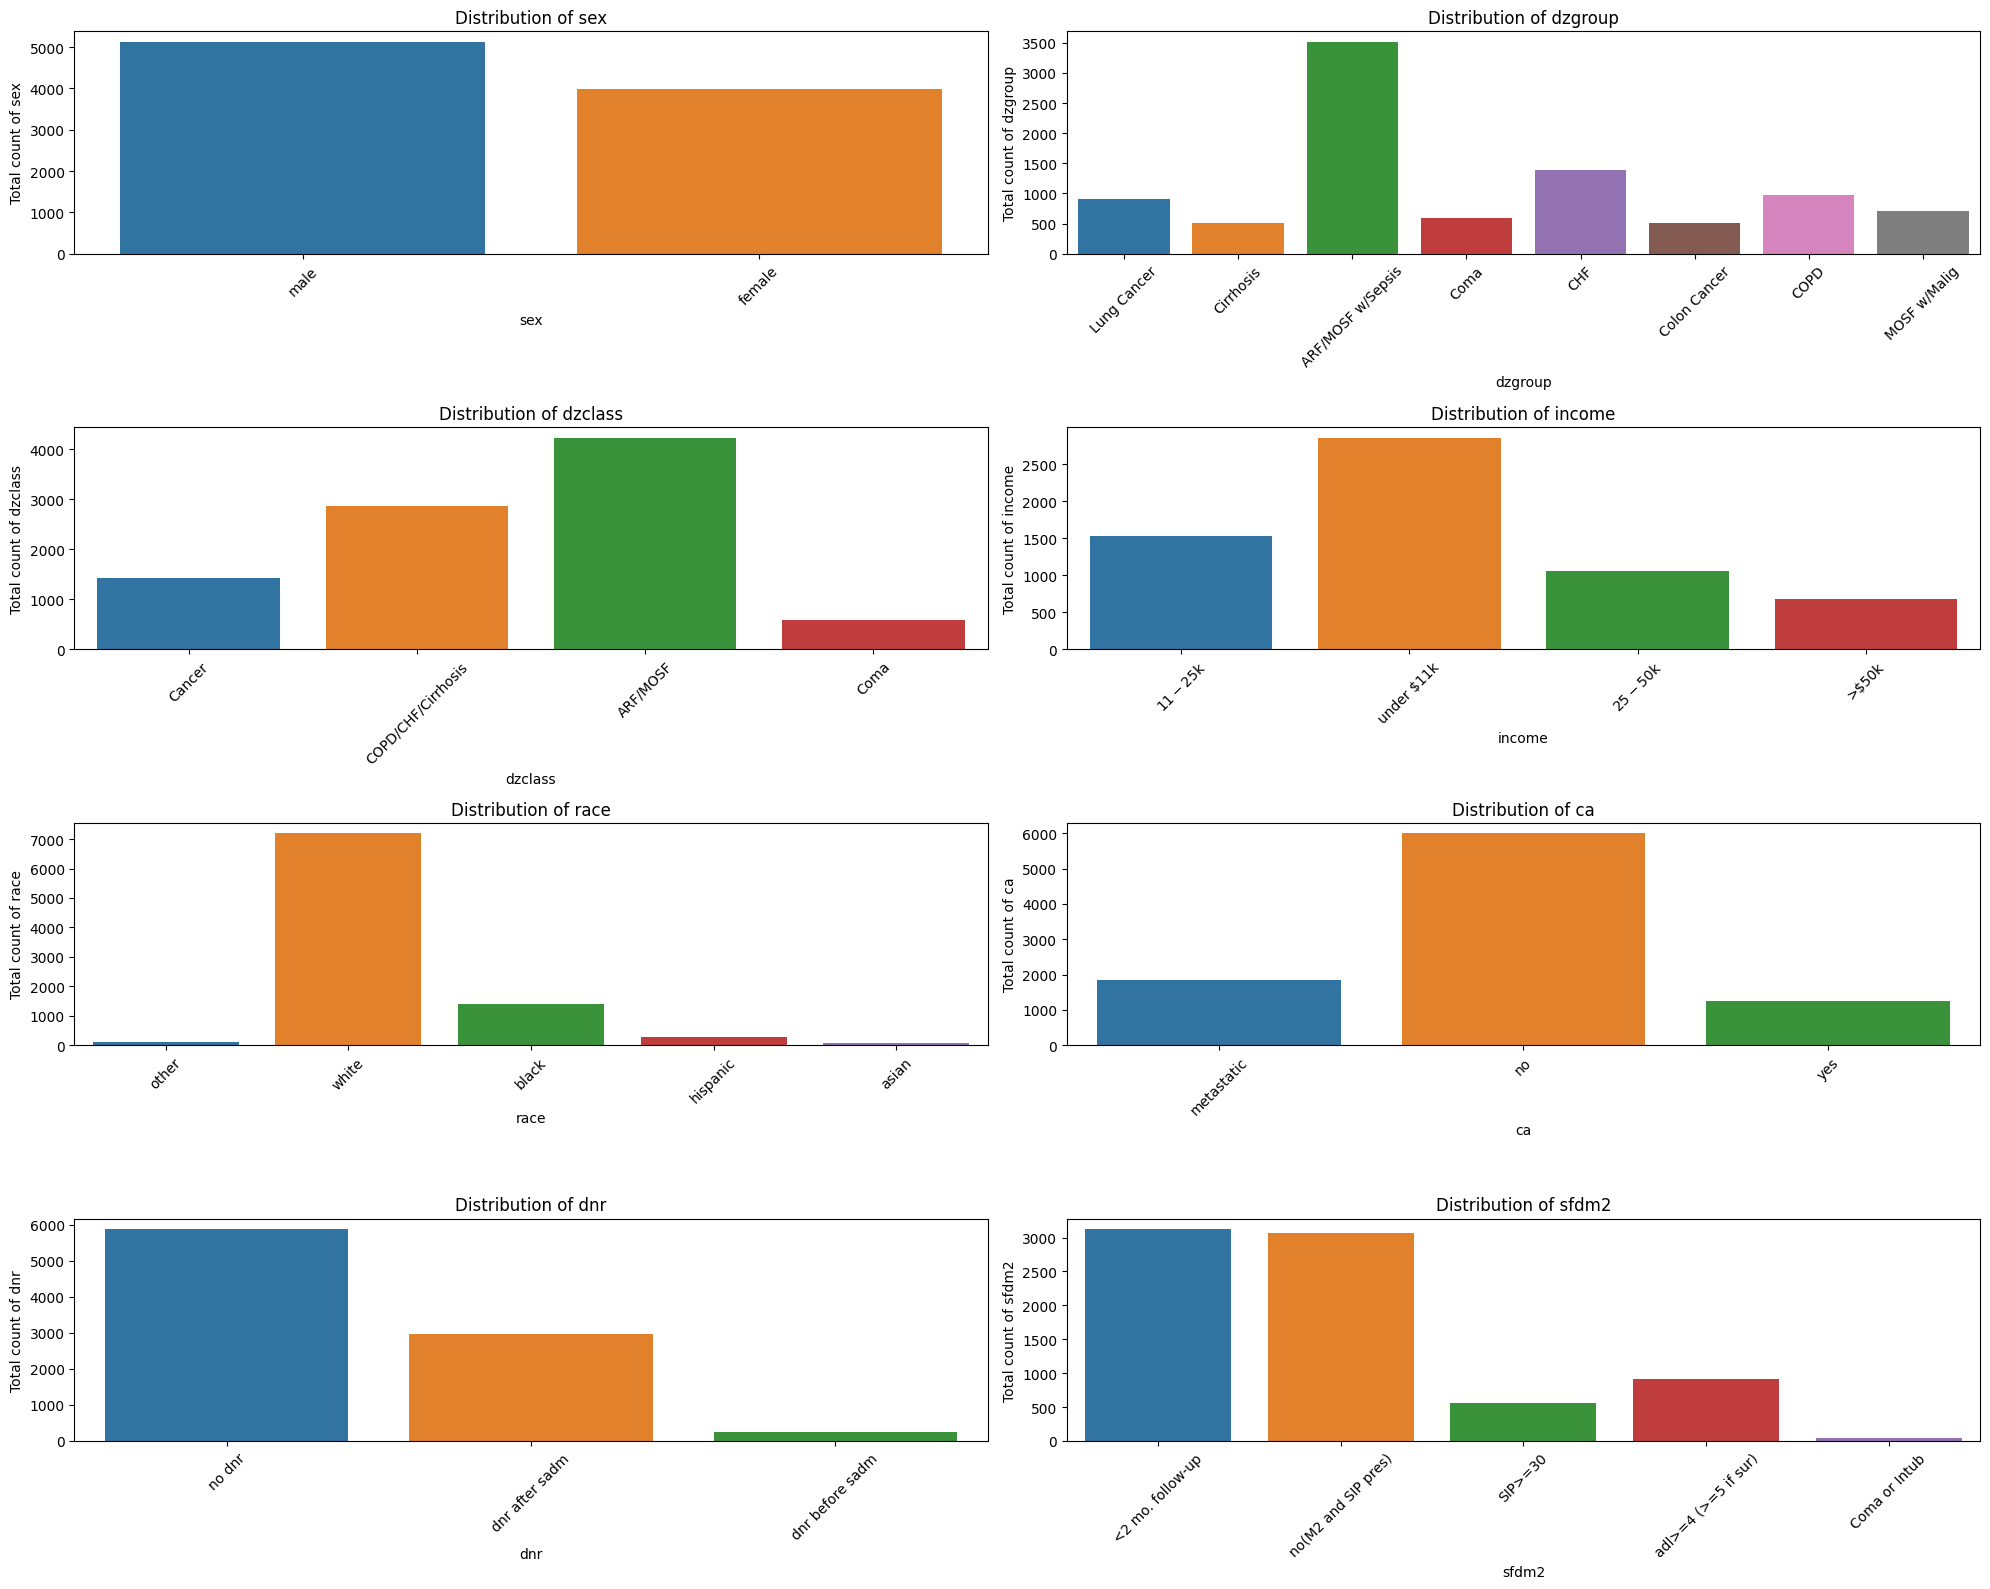

In [ ]:
# Selecting only the object columns
df_object = df.select_dtypes(include=['object'])

# Determine the number of rows and columns for the subplots
n_cols = 2  # You can adjust this as needed
n_rows = (len(df_object.columns) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 4 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plotting the distribution of each object-type column in its respective subplot
for i, column in enumerate(df_object.columns):
    sns.countplot(data=df_object, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel(f"Total count of {column}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Optional: Display the plot
plt.show()

#### **3.2.2.3** Correlation Analysis

In [ ]:
# Mapping string categoric values to numeric categoric values to check correlation
# Creating copy of original dataframe
df_dummies = df.copy()

# Dropping ID column
df_dummies = df_dummies.drop('ID', axis=1)

str_categoryFeatures = ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2']

# Loop through each categorical feature and replace it with its dummy encoded values
for feature in str_categoryFeatures:
    # Create a mapping from each unique category to a unique integer
    category_map = {category: index for index, category in enumerate(df_dummies[feature].unique())}

    # Replace the original column values with the mapped integer values
    df_dummies[feature] = df_dummies[feature].map(category_map)

# Display the first few rows of the modified DataFrame
df_dummies.head()

age  death  sex  hospdead  slos  d.time  dzgroup  dzclass  num.co  \
0  62.84998      0    0         0     5    2029        0        0       0   
1  60.33899      1    1         1     4       4        1        1       2   
2  52.74698      1    1         0    17      47        1        1       2   
3  42.38498      1    1         0     3     133        0        0       2   
4  79.88495      0    1         0    16    2029        2        2       1   

    edu  income  scoma  charges  totcst  totmcst    avtisst  race        sps  \
0  11.0       0    0.0   9715.0     NaN      NaN   7.000000     0  33.898438   
1  12.0       0   44.0  34496.0     NaN      NaN  29.000000     1  52.695312   
2  12.0       1    0.0  41094.0     NaN      NaN  13.000000     1  20.500000   
3  11.0       1    0.0   3075.0     NaN      NaN   7.000000     1  20.097656   
4   NaN       2   26.0  50127.0     NaN      NaN  18.666656     1  23.500000   

    aps    surv2m    surv6m  hday  diabetes  dementia  ca  prg2m  prg6m  dnr  \
0  20.0  0.262939  0.036995     1         0         0   0   0.50   0.25    0   
1  74.0  0.001000  0.000000     3         0         0   1   0.00   0.00    1   
2  45.0  0.790894  0.664917     4         0         0   1   0.75   0.50    0   
3  19.0  0.698975  0.411987     1         0         0   0   0.90   0.50    0   
4  30.0  0.634888  0.532959     3         0         0   1   0.90   0.90    0   

   dnrday  meanbp       wblc    hrt  resp      temp       pafi       alb  \
0     5.0    97.0   6.000000   69.0  22.0  36.00000  388.00000  1.799805   
1     NaN    43.0  17.097656  112.0  34.0  34.59375   98.00000       NaN   
2    17.0    70.0   8.500000   88.0  28.0  37.39844  231.65625       NaN   
3     3.0    75.0   9.099609   88.0  32.0  35.00000        NaN       NaN   
4    16.0    59.0  13.500000  112.0  20.0  37.89844  173.31250       NaN   

       bili      crea    sod        ph  glucose  bun  urine  adlp  adls  \
0  0.199982  1.199951  141.0  7.459961      NaN  NaN    NaN   7.0   7.0   
1       NaN  5.500000  132.0  7.250000      NaN  NaN    NaN   NaN   1.0   
2  2.199707  2.000000  134.0  7.459961      NaN  NaN    NaN   1.0   0.0   
3       NaN  0.799927  139.0       NaN      NaN  NaN    NaN   0.0   0.0   
4       NaN  0.799927  143.0  7.509766      NaN  NaN    NaN   NaN   2.0   

   sfdm2  adlsc  
0      0    7.0  
1      1    1.0  
2      1    0.0  
3      2    0.0  
4      2    2.0

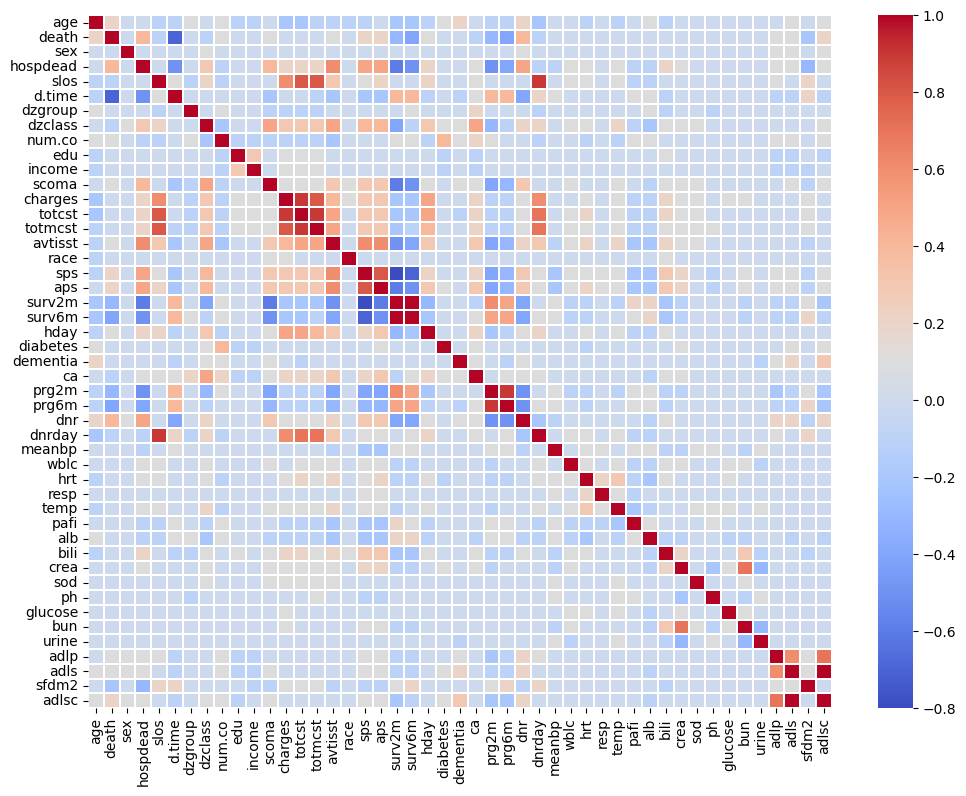

In [ ]:
# Find correlation between features
corr_matrix = round(df_dummies.corr(),1)

# # Create mask of lower triangle
# upperTri = np.triu(corr_matrix)

# Print the plot
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, annot=False, fmt=".1f", linewidth=.1, cmap='coolwarm')
plt.show()

##### **Insights**
1. **Hospital Mortality (`hospdead`)**:
   - `hospdead` shows a moderate positive correlation with variables like `avtisst` (0.55), `aps` (Acute Physiology Score, 0.48), and `sps` (0.46). This suggests that higher scores in these clinical assessments are associated with higher rates of hospital mortality.
   - There is a notable negative correlation (-0.49) between `hospdead` and `d.time` (days until death), indicating that patients who die in the hospital tend to have a shorter time until death post-assessment.

2. **Length of Stay (`slos`)**:
   - `slos` has a strong positive correlation with `totcst` (total cost, 0.77) and `totmcst` (0.77), suggesting that longer hospital stays are associated with higher costs.
   - It also shows a moderate positive correlation with `avtisst` (0.29) and `charges` (0.64), indicating that patients with longer stays might have higher acuity or complexity.

3. **Time Until Death (`d.time`)**:
   - `d.time` shows a strong negative correlation with `death` (-0.71), indicating that patients who die have a shorter duration post-assessment.
   - The negative correlation with `sps` (-0.23), `aps` (-0.22), and `avtisst` (-0.23) suggests that higher scores in these assessments are associated with a shorter duration to death.


## **3.3** Cleaning Dataset
1. Identification Column (`ID`):
  * The column `ID` will be excluded from the dataset as it does not contribute to the final analytical visualizations. Its presence is deemed extraneous for the purposes of this study.


2. Education, Income and Race Columns (`edu`, `income`,`race`):
  * Due to the lack of discernible patterns or informative data, the missing values in the edu and income columns will be assigned a placeholder value of 'NA'. This approach acknowledges the current inability to accurately infer educational background or income level for each patient.


3. ADL Score Columns (`adls` and `adlsc`):
  * A notable correlation exists between the adls and adlsc columns, attributed to their representation of analogous data. Specifically, the adls column values were imputed based on the ADL score, as evidenced by the metadata snapshot and metadata website available here (refer to this image <img src="https://drive.google.com/uc?export=view&id=1cT5TcaxcYmgb5hkIbyauiB9UXQBLzNLV" width="300" height="60" alt="adlsc"> and [link](https://archive.ics.uci.edu/dataset/880/support2)). Consequently, one of these columns can be considered redundant and thus removed from the dataset.


4. Imputing Missing Values based on recommendation:
  * As per the recommendation on this website, the most reasonable way to handle missing value in columns `alb`, `pafi`, `bili`, `crea`, `bun`, `wblc` and `urine` is to filling missing values with the recommended values on the metadata [website](https://hbiostat.org/data/repo/supportdesc). Below is the screenshot of those values for reference:
  <img src="https://drive.google.com/uc?export=view&id=1jBmkjUnIztwLY5lpgmE5bPlX16RSOQ3f" width="650" height="150" alt="adlsc">.


5. Columns with Singular Missing Values:
  * Upon examination of the dataset, it has been noted that certain columns contain only a solitary missing value. To maintain the integrity of the data and ensure the robustness of subsequent analyses, rows that exhibit these missing values will be excluded from the dataset.


6. Management of Missing Data in Additional Variables:
  * The extant missing values within the dataset were not imputed owing to constraints in domain-specific expertise. Consequently, the decision was made not to exclude these records to preserve the dataset's integrity. Eliminating data in the absence of comprehensive domain understanding may have led to a reduction in the sample size, thereby potentially compromising the breadth and depth of subsequent analyses and visual interpretations.


### **3.3.1** ID Column

In [ ]:
# Drop ID column
cleaned_df = df.drop('ID', axis=1)
cleaned_df.head()

age  death     sex  hospdead  slos  d.time            dzgroup  \
0  62.84998      0    male         0     5    2029        Lung Cancer   
1  60.33899      1  female         1     4       4          Cirrhosis   
2  52.74698      1  female         0    17      47          Cirrhosis   
3  42.38498      1  female         0     3     133        Lung Cancer   
4  79.88495      0  female         0    16    2029  ARF/MOSF w/Sepsis   

              dzclass  num.co   edu      income  scoma  charges  totcst  \
0              Cancer       0  11.0    $11-$25k    0.0   9715.0     NaN   
1  COPD/CHF/Cirrhosis       2  12.0    $11-$25k   44.0  34496.0     NaN   
2  COPD/CHF/Cirrhosis       2  12.0  under $11k    0.0  41094.0     NaN   
3              Cancer       2  11.0  under $11k    0.0   3075.0     NaN   
4            ARF/MOSF       1   NaN         NaN   26.0  50127.0     NaN   

   totmcst    avtisst   race        sps   aps    surv2m    surv6m  hday  \
0      NaN   7.000000  other  33.898438  20.0  0.262939  0.036995     1   
1      NaN  29.000000  white  52.695312  74.0  0.001000  0.000000     3   
2      NaN  13.000000  white  20.500000  45.0  0.790894  0.664917     4   
3      NaN   7.000000  white  20.097656  19.0  0.698975  0.411987     1   
4      NaN  18.666656  white  23.500000  30.0  0.634888  0.532959     3   

   diabetes  dementia          ca  prg2m  prg6m     dnr  dnrday  meanbp  \
0         0         0  metastatic   0.50   0.25  no dnr     5.0    97.0   
1         0         0          no   0.00   0.00     NaN     NaN    43.0   
2         0         0          no   0.75   0.50  no dnr    17.0    70.0   
3         0         0  metastatic   0.90   0.50  no dnr     3.0    75.0   
4         0         0          no   0.90   0.90  no dnr    16.0    59.0   

        wblc    hrt  resp      temp       pafi       alb      bili      crea  \
0   6.000000   69.0  22.0  36.00000  388.00000  1.799805  0.199982  1.199951   
1  17.097656  112.0  34.0  34.59375   98.00000       NaN       NaN  5.500000   
2   8.500000   88.0  28.0  37.39844  231.65625       NaN  2.199707  2.000000   
3   9.099609   88.0  32.0  35.00000        NaN       NaN       NaN  0.799927   
4  13.500000  112.0  20.0  37.89844  173.31250       NaN       NaN  0.799927   

     sod        ph  glucose  bun  urine  adlp  adls                sfdm2  \
0  141.0  7.459961      NaN  NaN    NaN   7.0   7.0                  NaN   
1  132.0  7.250000      NaN  NaN    NaN   NaN   1.0     <2 mo. follow-up   
2  134.0  7.459961      NaN  NaN    NaN   1.0   0.0     <2 mo. follow-up   
3  139.0       NaN      NaN  NaN    NaN   0.0   0.0  no(M2 and SIP pres)   
4  143.0  7.509766      NaN  NaN    NaN   NaN   2.0  no(M2 and SIP pres)   

   adlsc  
0    7.0  
1    1.0  
2    0.0  
3    0.0  
4    2.0

### **3.3.2** Education, Income and Race Columns

In [ ]:
# Filling NA values in 'edu', 'income' and 'race' columns
cleaned_df.loc[:, ['edu', 'income','race']] = cleaned_df[['edu', 'income','race']].fillna(value='NA')

### **3.3.3** Columns with Singular Missing Values

In [ ]:
# Dropping rows where any column has exactly one missing value
cleaned_df = cleaned_df.dropna(subset=df.columns[df.isnull().sum() == 1])

### **3.3.4** Drop ADLS Score Column

In [ ]:
# Drop adls score column
cleaned_df = cleaned_df.drop('adls', axis=1)

### **3.3.5** Imputing Missing Values based on recommendation

In [ ]:
# Impute alb, pafi, bili, crea, bun, wblc and urine using given values from the metadata
cleaned_df.loc[:, ['alb']] = cleaned_df[['alb']].fillna(value=3.5)

cleaned_df.loc[:, ['pafi']] = cleaned_df[['pafi']].fillna(value=333.3)

cleaned_df.loc[:, ['bili']] = cleaned_df[['bili']].fillna(value=1.01)

cleaned_df.loc[:, ['crea']] = cleaned_df[['crea']].fillna(value=1.01)

cleaned_df.loc[:, ['bun']] = cleaned_df[['bun']].fillna(value=6.51)

cleaned_df.loc[:, ['wblc']] = cleaned_df[['wblc']].fillna(value=9.000000)

cleaned_df.loc[:, ['urine']] = cleaned_df[['urine']].fillna(value=2502)

In [ ]:
# Final cleaned data
calculate_missing_values(cleaned_df)

The total percentage of missing values is: 5.2% 

Combined Summary Table:
========  =========  ===========  ==========  ============
..          Missing    % Missing    Outliers    % Outliers
========  =========  ===========  ==========  ============
adlp           5639        61.95         149          1.64
glucose        4499        49.42         272          2.99
totmcst        3473        38.15         495          5.44
ph             2282        25.07         260          2.86
prg2m          1648        18.1            0          0
prg6m          1632        17.93           0          0
sfdm2          1400        15.38           0          0
totcst          886         9.73         749          8.23
charges         171         1.88         912         10.02
avtisst          81         0.89          43          0.47
dnr              29         0.32           0          0
dnrday           29         0.32         798          8.77
race              0         0              0         

---
## **3.4** Visualization
---

### **3.4.1** Distribution of Different Diagnoses Vs Age

#### **3.4.1.1** **`age`** distribution by **`dzclass`, `dzgroup`, `ca`**

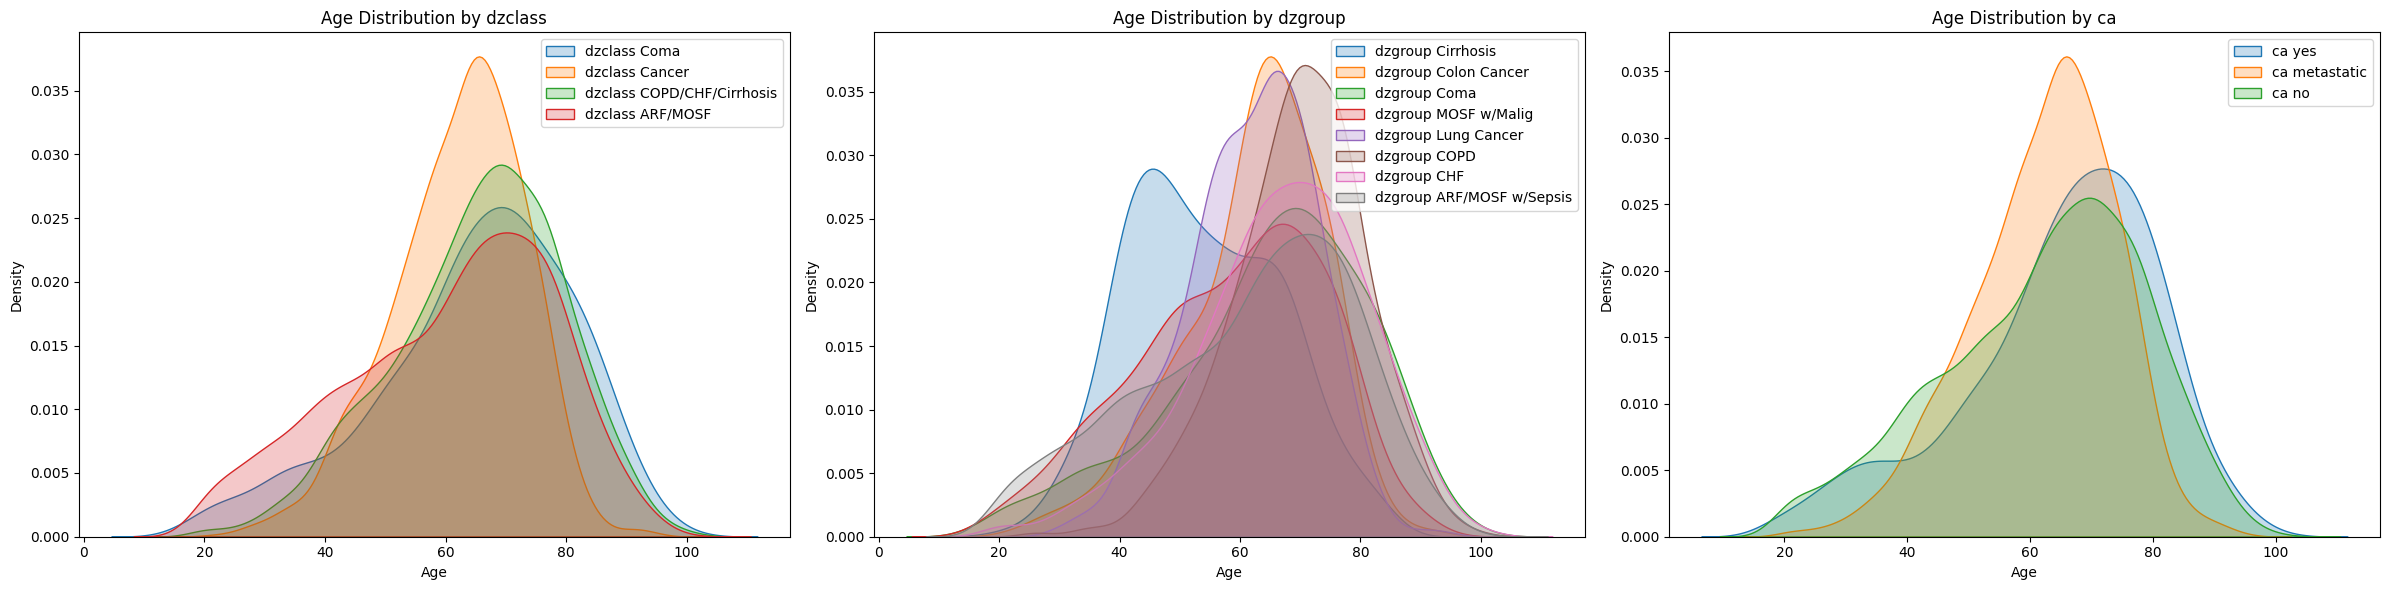

In [ ]:
def mult_catgPlot(columns, data):
    # Number of columns
    num_columns = len(columns)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_columns, figsize=(8 * num_columns, 6))

    # Iterate over each column and create a plot
    for i, multi_cat_column in enumerate(columns):
        # Create a dictionary to hold the count of each category
        category_counts = {category: data[data[multi_cat_column] == category].shape[0]
                           for category in data[multi_cat_column].unique()}

        # Sort categories by count (smallest to largest)
        sorted_categories = sorted(category_counts, key=category_counts.get)

        # Plot KDE for each category
        for category in sorted_categories:
            ages = data['age'][data[multi_cat_column] == category]
            sns.kdeplot(ages, shade=True, label=f'{multi_cat_column} {category}', ax=axes[i])

        axes[i].set_title(f'Age Distribution by {multi_cat_column}')
        axes[i].set_xlabel('Age')
        axes[i].set_ylabel('Density')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

mult_catgPlot(['dzclass', 'dzgroup', 'ca'], cleaned_df)

##### **Insights**
1. **Age Distribution by Disease Class (`dzclass`):**
    * The distribution for *'Coma'* tends to skew towards younger ages, with a peak around 20-30 years and a long tail extending into older age groups.
    * *'Cancer'* has a wider distribution, indicating that it affects a broad age range but most commonly peaks around 60-70 years.
    * *'COPD/CHF/Cirrhosis'* also has a broad age distribution, with a peak around 70-80 years, suggesting these conditions are more common in older adults.
    * *'ARF/MOSF'* has a peak around 70 years, similar to *'COPD/CHF/Cirrhosis'*, indicating that acute renal failure/multiple organ system failure also primarily affects older adults.

2. **Age Distribution by Disease Group (`dzgroup`):**
    * Conditions like *'Cirrhosis'* and *'Coma'* show a peak in younger adults (around 40-50 years for *'Cirrhosis'* and 20-30 years for *'Coma'*).
    * *'MOSF w/Malig'* (Multiple Organ System Failure with Malignancy) and *'Colon Cancer'* tend to affect middle-aged to older adults, peaking around 60-70 years.
    * *'Lung Cancer'* and *'COPD'* show a significant distribution in older adults, particularly around 70-80 years.
    * *'CHF'* (Congestive Heart Failure) and *'ARF/MOSF w/Sepsis'* have their highest density in the older age groups, around 70-80 years, again indicating these are conditions commonly associated with advanced age.

3. **Age Distribution by Cancer Status (`ca`):**
    * Individuals with cancer (*'ca yes'*) have an age distribution that peaks around 60-70 years.
    * Those with metastatic cancer (*'ca metastatic'*) show a peak in the distribution around the same age range, which suggests that metastasis is also most commonly diagnosed in older adults.
    * The age distribution for individuals without cancer (*'ca no'*) is quite different, with a peak around 60 years and a lower overall density across age groups compared to those with cancer.

#### **3.4.1.2** **`age`** distribution by **`diabetes`, `dementia`**

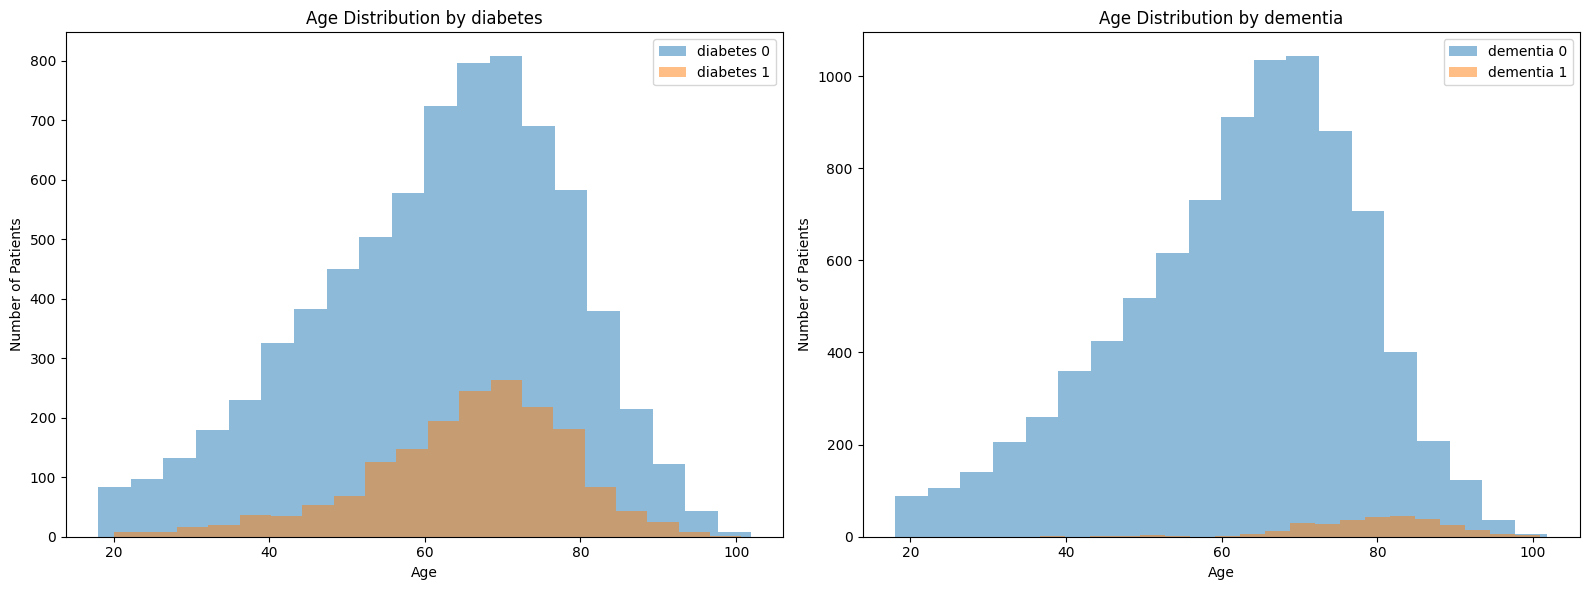

In [ ]:
def hist_plot(columns, data):
    # Number of columns
    num_columns = len(columns)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_columns, figsize=(8 * num_columns, 6))

    # Iterate over each column and create a plot
    for i, column in enumerate(columns):
        # Unique categories in the column
        categories = data[column].unique()

        # Plot histogram for each category
        for category in categories:
            ages = data['age'][data[column] == category]
            axes[i].hist(ages, bins=20, alpha=0.5, label=f'{column} {category}')

        axes[i].set_title(f'Age Distribution by {column}')
        axes[i].set_xlabel('Age')
        axes[i].set_ylabel('Number of Patients')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Use the function for 'diabetes' and 'dementia' columns
hist_plot(['diabetes', 'dementia'], cleaned_df)

##### **Insights**
1. **Age Distribution by Diabetes (`diabetes`):**
  * The majority of patients without diabetes (indicated as *'diabetes 0'*) are distributed across a wide age range, with the highest count in the middle-aged group, peaking around 60 years.
  * Patients with diabetes (indicated as *'diabetes 1'*) are fewer in number compared to those without. The age distribution for diabetic patients has a more concentrated peak around the age of 60, suggesting that diabetes is more prevalent in this age group.
  * The overlap between the two groups suggests that while diabetes is more common in the older population, it is not exclusive to them; younger age groups also have a significant number of diabetic patients.

2. **Age Distribution by Dementia (`dementia`):**
  * Dementia is largely a condition of older age, as indicated by the peak and concentration of *'dementia 1'* in the higher age range, particularly after 70 years of age.
  * There are very few younger patients with dementia; the distribution for patients with dementia (indicated as *'dementia 1'*) shows a steep increase from around age 60 and peaks at around age 80.
  * The count of patients without dementia (indicated as *'dementia 0'*) is high across all age groups but shows a decline as age increases, which is expected as the elderly population naturally decreases in number.

### **3.4.2** Analysis for Trends

#### **3.4.2.1 What insights can be drawn about the relationship between demographic and clinical characteristics and patient outcomes in a hospital setting?**

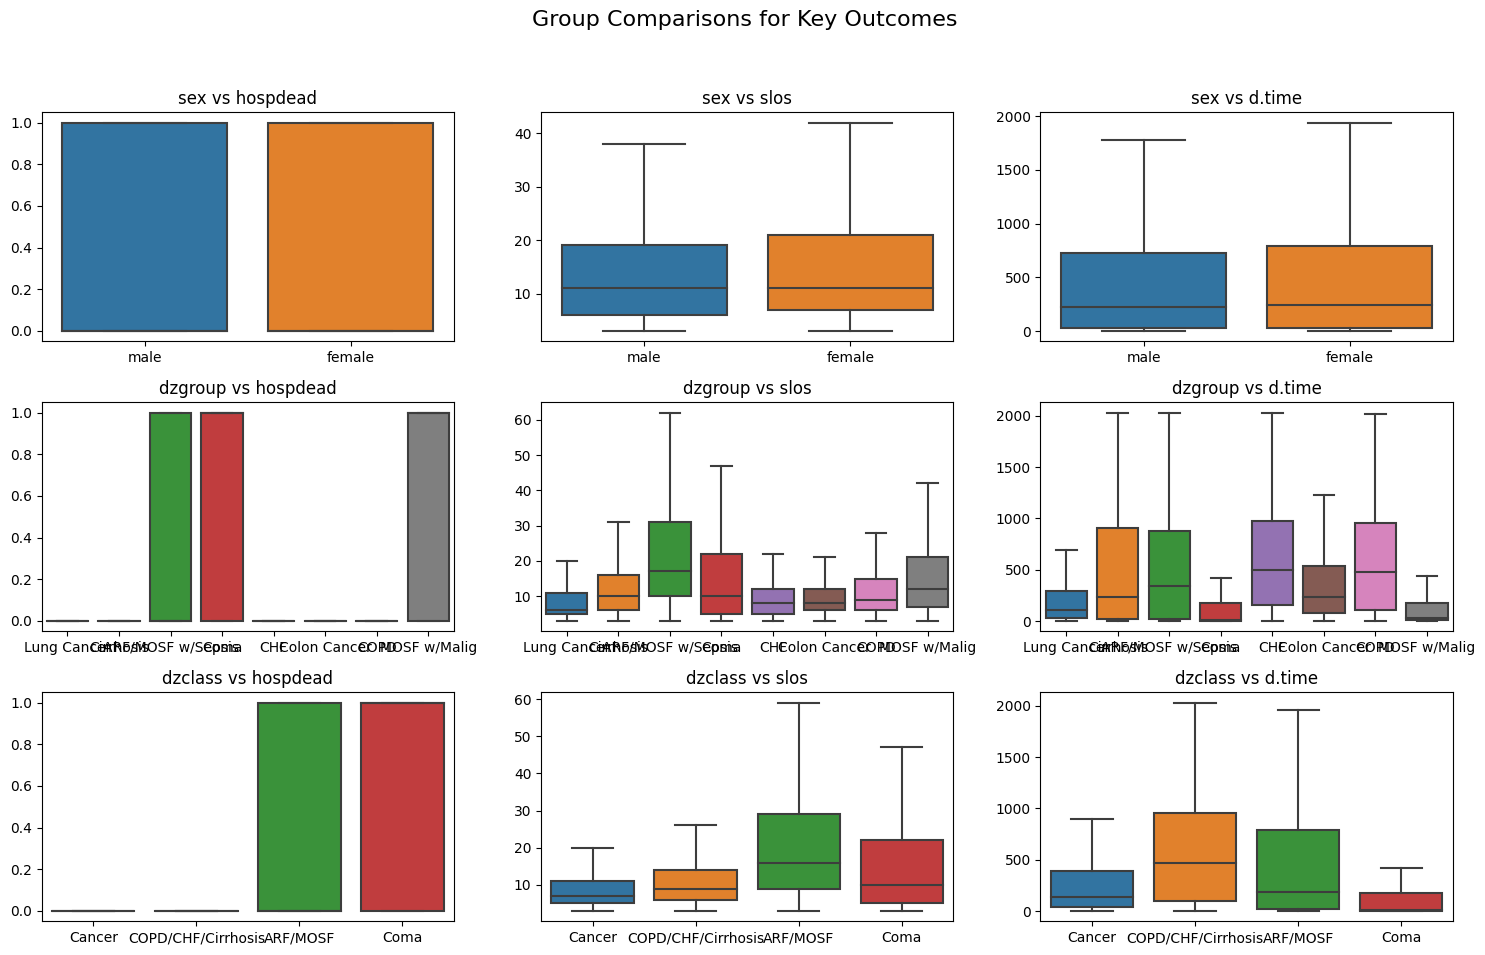

In [ ]:
# For group comparisons, we'll focus on a few key categorical variables and their relation to important outcomes
categorical_variables = ['sex', 'dzgroup', 'dzclass']
outcome_variables = ['hospdead', 'slos', 'd.time']

# Creating plots to compare groups
fig, axes = plt.subplots(len(categorical_variables), len(outcome_variables), figsize=(15, 10))
fig.suptitle('Group Comparisons for Key Outcomes', fontsize=16)

for i, cat_var in enumerate(categorical_variables):
    for j, out_var in enumerate(outcome_variables):
        if cleaned_df[out_var].dtype == 'int64' or cleaned_df[out_var].dtype == 'float64':
            # Boxplot for numerical outcomes
            sns.boxplot(ax=axes[i, j], x=cat_var, y=out_var, data=cleaned_df, showfliers=False)
        else:
            # Count plot for binary/categorical outcomes
            sns.countplot(ax=axes[i, j], x=cat_var, hue=out_var, cleaned_df=cleaned_df)
        axes[i, j].set_title(f'{cat_var} vs {out_var}')
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **Insights**

1. **Sex (`sex`) vs Hospital Mortality (`hospdead`):**
  *	The bar plot suggests that there is a negligible difference in hospital mortality rates between male and female patients. Both groups exhibit mortality rates close to or above 80%, indicating a high severity of illness within the sampled population.
2.	**Sex (`sex`) vs Length of Stay (`slos`):**
  *	The box plot shows that the median length of stay in the hospital is slightly higher for female patients compared to male patients. The interquartile range (IQR) is also broader for females, suggesting greater variability in the length of hospital stays among female patients. However, the presence of outliers, as indicated by the whiskers, is considerable in both groups.
3.	**Sex (`sex`) vs Time Until Death (`d.time`):**
  *	The box plot indicates that the median time until death is similar for both male and female patients, with a wide range of values as shown by the extended whiskers. The similarity in medians suggests no significant difference in survival time post-hospitalization between the sexes.
4.	**Disease Group (`dzgroup`) vs Hospital Mortality (`hospdead`):**
  *	The bar plot illustrates that the hospital mortality rate varies significantly across different disease groups. The highest mortality is seen in the 'Coma' group, followed by 'ARF/MOSF w/Sepsis'. In contrast, patients with 'Lung Cancer' and 'Colon Cancer' have lower mortality rates in the hospital setting.
5.	**Disease Group (`dzgroup`) vs Length of Stay (`slos`):**
  *	The box plot demonstrates that 'ARF/MOSF w/Sepsis' patients tend to have a longer median length of hospital stay, with 'Coma' patients also showing a wide IQR, indicative of variability. Other groups, like 'Lung Cancer', have a shorter median stay and less variability.
6.	**Disease Group (`dzgroup`) vs Time Until Death (`d.time`):**
  *	This box plot indicates that survival time post-assessment varies by disease group. 'Colon Cancer' patients have the longest median time until death, whereas 'Coma' patients have the shortest. Notably, the 'ARF/MOSF w/Sepsis' group shows a large IQR, suggesting high variability in patient outcomes.
7.	**Disease Class (`dzclass`) vs Hospital Mortality (`hospdead`):**
  *	The bar plot comparing disease classes reveals that the 'Coma' class has the highest hospital mortality rate, almost reaching 100%, while the 'Cancer' class has a considerably lower rate, around 60%.
8.	**Disease Class (`dzclass`) vs Length of Stay (`slos`):**
  *	The box plot for disease classes shows that 'Coma' patients have a wide range of hospital stay lengths, as indicated by the long whiskers and wide IQR. 'ARF/MOSF' has the highest median length of stay among the groups.
9.	**Disease Class (`dzclass`) vs Time Until Death (`d.time`):**
  *	In comparing disease classes, 'Cancer' patients have a notably longer median time until death, suggesting better prognosis post-assessment. In contrast, 'Coma' patients show a much lower median time until death, with less variability.


#### **3.4.2.2 What associations exist between the length of hospital stay and key clinical measurements in critically ill patients, and how might these associations inform clinical decision-making and resource allocation in a hospital setting?**

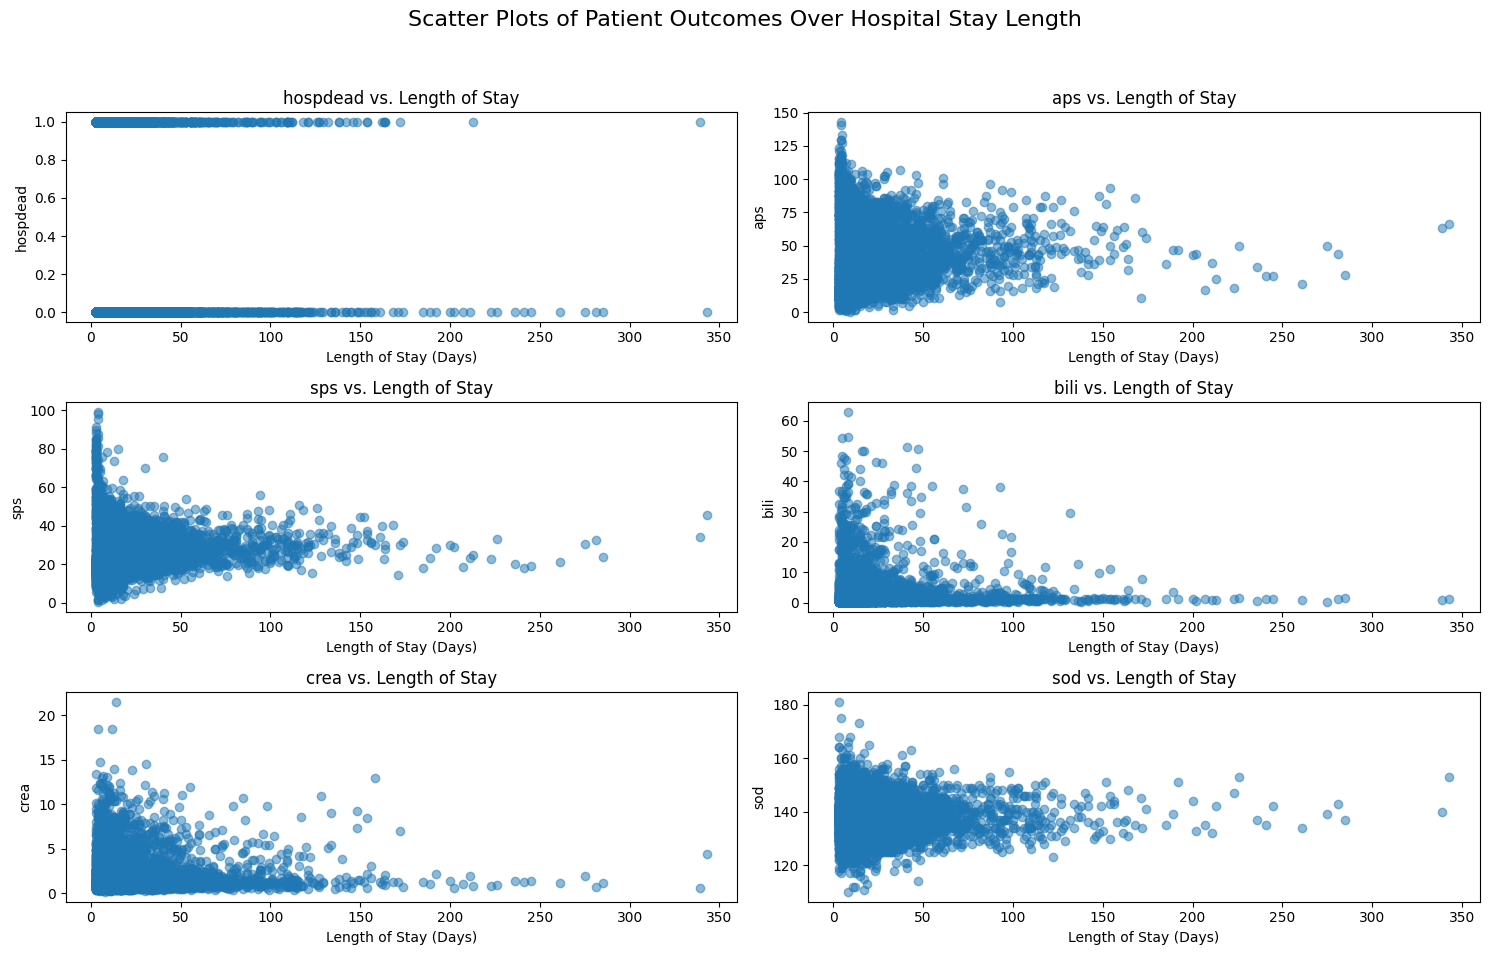

In [ ]:
# Selecting relevant columns for this analysis
columns_for_slos_trend = ['hospdead', 'aps', 'sps', 'bili', 'crea', 'sod', 'slos']

# Create subplots for scatter plots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots of Patient Outcomes Over Hospital Stay Length', fontsize=16)

axes = axes.flatten()
for i, col in enumerate(columns_for_slos_trend[:-1]):  # Exclude 'slos' for x-axis
    axes[i].scatter(cleaned_df['slos'], cleaned_df[col], alpha=0.5)
    axes[i].set_title(f'{col} vs. Length of Stay')
    axes[i].set_xlabel('Length of Stay (Days)')
    axes[i].set_ylabel(col)

# Adjust layout for better visibility
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **Insights**
1. **Hospital Mortality (`hospdead`) vs. Length of Stay (`slos`)**:
  * The plot does not suggest a clear trend between hospital mortality and the length of stay. The distribution of mortality (alive or deceased) is consistent across different lengths of stay.

2. **Acute Physiology Score (`aps`) vs. Length of Stay (`slos`)**:
  * There is a high concentration of varied scores for shorter hospital stays, but as the length of stay increases, the variability decreases, which may indicate that patients with longer stays have less acute physiological distress.

3. **Simplified Acute Physiology Score (`sps`) vs. Length of Stay (`slos`)**:
  * Similar to the Acute Physiology Score, the Simplified Acute Physiology Score shows a decrease in score variability with increased length of stay, suggesting a potential stabilization or resolution of acute physiological issues over time.

4. **Bilirubin (`bili`) vs. Length of Stay (`slos`)**:
  * A wide range of bilirubin levels is seen at the beginning of the hospital stay, with a trend towards normalization or lower levels over time. This could imply successful treatment or management of conditions associated with bilirubin levels.

5. **Creatinine (`crea`) vs. Length of Stay (`slos`)**:
  * While there is a slight clustering of higher creatinine levels at shorter stays, there is no strong trend over time. This might reflect the presence of both acute and chronic renal issues in the patient population.

6. **Sodium (`sod`) vs. Length of Stay (`slos`)**:
  * Sodium levels are mostly within a normal range, with instances of hyponatremia concentrated in shorter stays. Over time, the variation in sodium levels decreases, which could suggest effective management of sodium imbalances.


#### **3.4.2.3 How do disease-specific characteristics influence hospital mortality, physiological acuity, length of stay, and time until death, and what implications do these influences have for clinical management and hospital resource planning?**

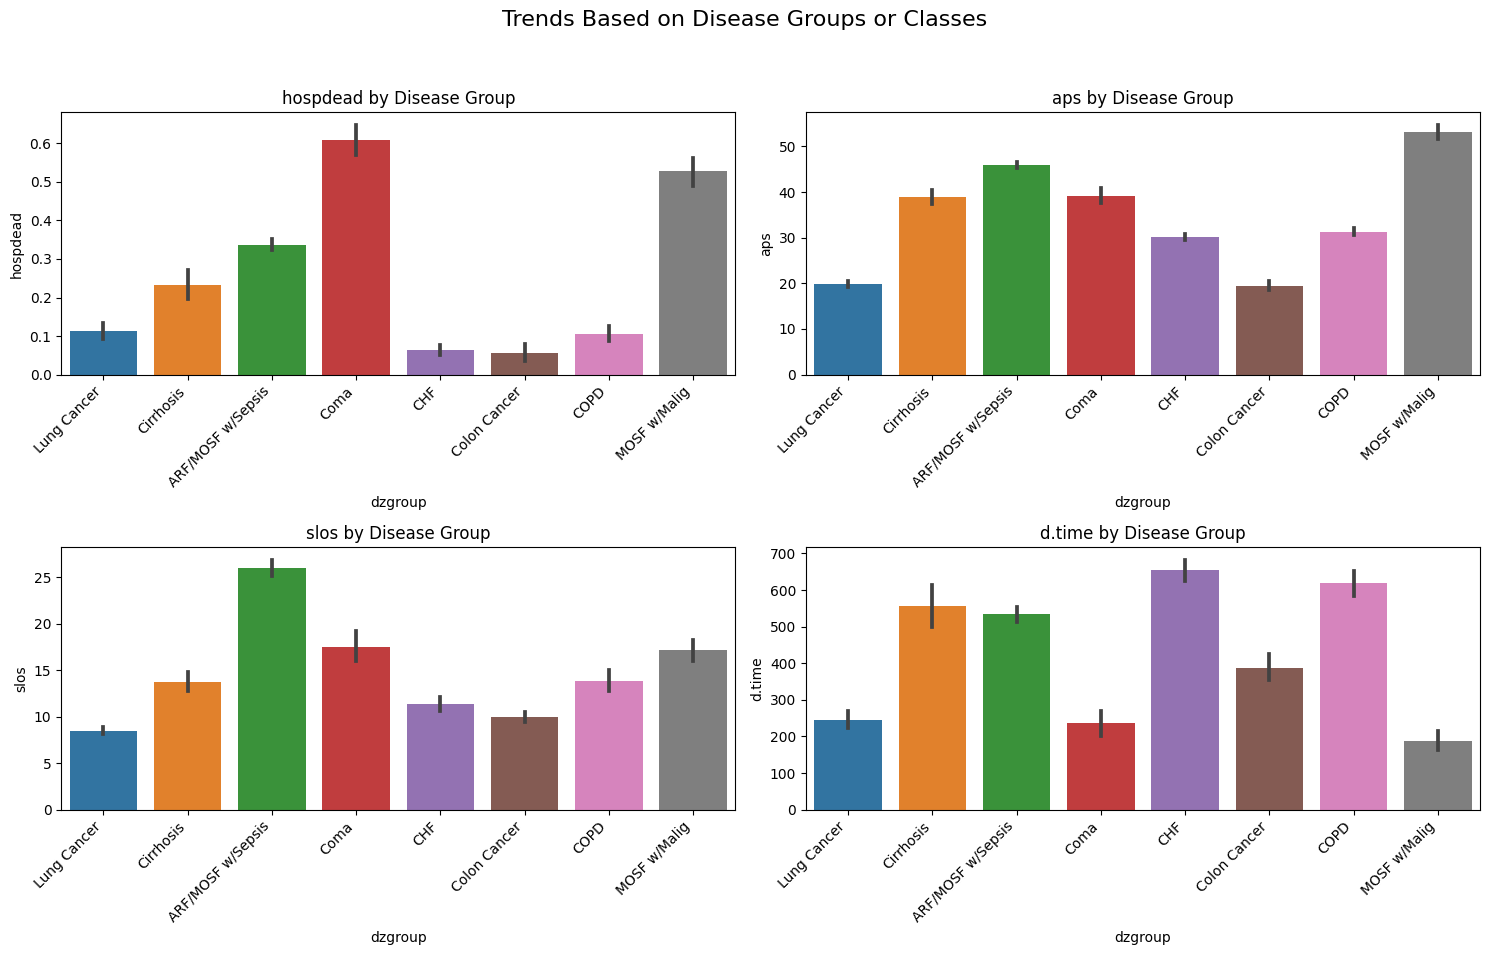

In [ ]:
# Trends Based on Disease Groups or Classes
# Plotting mean values of key metrics for each disease group and class
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Trends Based on Disease Groups or Classes', fontsize=16)

# Key metrics
metrics = ['hospdead', 'aps', 'slos', 'd.time']

for i, metric in enumerate(metrics):
    ax = axes.flatten()[i]
    sns.barplot(ax=ax, x='dzgroup', y=metric, data=cleaned_df)
    ax.set_title(f'{metric} by Disease Group')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **Insights**
1. Hospital Mortality (`hospdead`) by Disease Group:
  * The bar graph demonstrates significant variation in hospital mortality rates across disease groups. The *'Coma'* group exhibits the highest mortality rate, which may reflect the severity and poor prognosis associated with coma in a hospital setting. Conversely, the `'Lung Cancer'` group shows the lowest mortality rate among the groups presented, suggesting a relative difference in acute lethality or effectiveness of interventions.

2. Acute Physiology Score (`aps`) by Disease Group:
  * The 'MOSF w/Malignancy' group has the highest mean acute physiology score, indicating severe physiological derangement, which could correspond with higher critical care needs. In contrast, the 'Lung Cancer' group has the lowest mean score, which could suggest a lower level of physiological instability within this group.

3. Length of Stay (`slos`) by Disease Group:
  * Patients with *'ARF/MOSF w/Sepsis'* have the longest mean length of stay, potentially indicating complex management and recovery processes. *'Coma'* patients also have a high mean length of stay, which may be associated with the need for prolonged intensive care.

4. Time Until Death (`d.time`) by Disease Group:
  * The 'Cirrhosis' and *'ARF/MOSF w/Sepsis'* groups have a higher mean time until death, possibly reflecting a longer trajectory of illness or a more extended period of medical intervention before death. The *'Coma'* group shows a notably lower mean time until death, aligning with the higher mortality rate and possibly suggesting rapid decompensation or life-threatening conditions that lead to death.

---
# **Discussion & Interpretation**
---

In [ ]:
df = cleaned_df
df.shape

(9103, 46)

## Chi-Square Test
> First I will write the code to identify and segregate all the numerical and object datatypes.

In [ ]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Identify object (categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Segregate the DataFrame based on data types
numerical_df = df[numerical_columns]
categorical_df = df[categorical_columns]

# Display the identified columns and segregated DataFrames
print("Numerical Columns:", numerical_columns)
print("\nCategorical Columns:", categorical_columns)

Numerical Columns: ['age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adlsc']

Categorical Columns: ['sex', 'dzgroup', 'dzclass', 'edu', 'income', 'race', 'ca', 'dnr', 'sfdm2']


In [ ]:
numerical_df.head()

age  death  hospdead  slos  d.time  num.co  scoma  charges  totcst  \
0  62.84998      0         0     5    2029       0    0.0   9715.0     NaN   
1  60.33899      1         1     4       4       2   44.0  34496.0     NaN   
2  52.74698      1         0    17      47       2    0.0  41094.0     NaN   
3  42.38498      1         0     3     133       2    0.0   3075.0     NaN   
4  79.88495      0         0    16    2029       1   26.0  50127.0     NaN   

   totmcst    avtisst        sps   aps    surv2m    surv6m  hday  diabetes  \
0      NaN   7.000000  33.898438  20.0  0.262939  0.036995     1         0   
1      NaN  29.000000  52.695312  74.0  0.001000  0.000000     3         0   
2      NaN  13.000000  20.500000  45.0  0.790894  0.664917     4         0   
3      NaN   7.000000  20.097656  19.0  0.698975  0.411987     1         0   
4      NaN  18.666656  23.500000  30.0  0.634888  0.532959     3         0   

   dementia  prg2m  prg6m  dnrday  meanbp       wblc    hrt  resp      temp  \
0         0   0.50   0.25     5.0    97.0   6.000000   69.0  22.0  36.00000   
1         0   0.00   0.00     NaN    43.0  17.097656  112.0  34.0  34.59375   
2         0   0.75   0.50    17.0    70.0   8.500000   88.0  28.0  37.39844   
3         0   0.90   0.50     3.0    75.0   9.099609   88.0  32.0  35.00000   
4         0   0.90   0.90    16.0    59.0  13.500000  112.0  20.0  37.89844   

        pafi       alb      bili      crea    sod        ph  glucose   bun  \
0  388.00000  1.799805  0.199982  1.199951  141.0  7.459961      NaN  6.51   
1   98.00000  3.500000  1.010000  5.500000  132.0  7.250000      NaN  6.51   
2  231.65625  3.500000  2.199707  2.000000  134.0  7.459961      NaN  6.51   
3  333.30000  3.500000  1.010000  0.799927  139.0       NaN      NaN  6.51   
4  173.31250  3.500000  1.010000  0.799927  143.0  7.509766      NaN  6.51   

    urine  adlp  adlsc  
0  2502.0   7.0    7.0  
1  2502.0   NaN    1.0  
2  2502.0   1.0    0.0  
3  2502.0   0.0    0.0  
4  2502.0   NaN    2.0

In [ ]:
categorical_df.head()

sex            dzgroup             dzclass   edu      income   race  \
0    male        Lung Cancer              Cancer  11.0    $11-$25k  other   
1  female          Cirrhosis  COPD/CHF/Cirrhosis  12.0    $11-$25k  white   
2  female          Cirrhosis  COPD/CHF/Cirrhosis  12.0  under $11k  white   
3  female        Lung Cancer              Cancer  11.0  under $11k  white   
4  female  ARF/MOSF w/Sepsis            ARF/MOSF    NA          NA  white   

           ca     dnr                sfdm2  
0  metastatic  no dnr                  NaN  
1          no     NaN     <2 mo. follow-up  
2          no  no dnr     <2 mo. follow-up  
3  metastatic  no dnr  no(M2 and SIP pres)  
4          no  no dnr  no(M2 and SIP pres)

#### Observation: Since the Chi square test is done on the categorical variables, let's choose a few pairs.

### Sex VS DZGroup

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['dzgroup'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpret the results
alpha = 0.05
print("\nSignificance Level (α):", alpha)
print("\nHypotheses:")
print("H0: There is no significant association between sex and dzgroup (They are independent).")
print("H1: There is a significant association between sex and dzgroup (They are not independent).")

# Compare p-value to the significance level
if p < alpha:
    print("\nReject the null hypothesis. There is a significant association between sex and dzgroup.")
else:
    print("\nFail to reject the null hypothesis. There is no significant association between sex and dzgroup.")

Contingency Table:
dzgroup  ARF/MOSF w/Sepsis  CHF  COPD  Cirrhosis  Colon Cancer  Coma  \
sex                                                                    
female                1590  528   476        184           223   311   
male                  1923  859   491        324           289   285   

dzgroup  Lung Cancer  MOSF w/Malig  
sex                                 
female           339           328  
male             569           384  

Chi-Square Statistic: 78.90566716067954
Degrees of Freedom: 7
P-value: 2.302234755417934e-14
Expected Frequencies Table:
dzgroup  ARF/MOSF w/Sepsis         CHF       COPD   Cirrhosis  Colon Cancer  \
sex                                                                           
female         1535.562672  606.269691  422.68406  222.051192    223.799626   
male           1977.437328  780.730309  544.31594  285.948808    288.200374   

dzgroup        Coma  Lung Cancer  MOSF w/Malig  
sex                                             
female 

<Figure size 1800x1000 with 0 Axes>

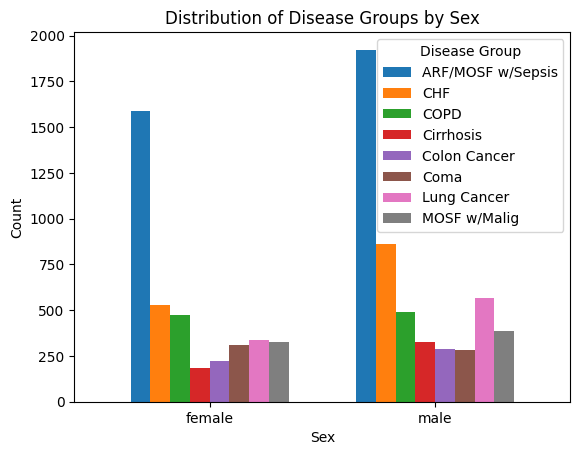

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['dzgroup'])

# Plot a grouped bar chart
plt.figure(figsize=(18, 10))
contingency_table.plot(kind='bar', width=0.7, rot=0)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Disease Groups by Sex')

# Show the plot
plt.legend(title='Disease Group')
plt.show()

### Race VS DZgroup

Contingency Table for Race and Disease Group:
dzgroup   ARF/MOSF w/Sepsis   CHF  COPD  Cirrhosis  Colon Cancer  Coma  \
race                                                                     
NA                       15     2     4          2             4     4   
asian                    33    12     1          5             5     5   
black                   568   268   103         61            45   122   
hispanic                123    54    20         29            19    14   
other                    40    17     5          8             8     7   
white                  2734  1034   834        403           431   444   

dzgroup   Lung Cancer  MOSF w/Malig  
race                                 
NA                  3             8  
asian              11             7  
black             112           112  
hispanic           12            19  
other               9            18  
white             761           548  

Chi-Square Statistic: 145.54921619124445
Degrees of Free

<Figure size 1200x600 with 0 Axes>

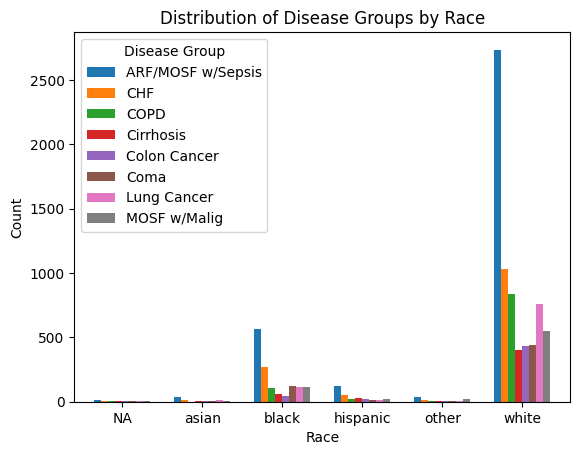

In [ ]:
# Create a contingency table
contingency_table_race = pd.crosstab(df['race'], df['dzgroup'])

# Print the contingency table
print("Contingency Table for Race and Disease Group:")
print(contingency_table_race)

# Perform the chi-square test
chi2_race, p_race, dof_race, expected_race = chi2_contingency(contingency_table_race)

# Display the results
print("\nChi-Square Statistic:", chi2_race)
print("Degrees of Freedom:", dof_race)
print("P-value:", p_race)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected_race, index=contingency_table_race.index, columns=contingency_table_race.columns))

# Interpret the results
alpha = 0.05
print("\nSignificance Level (α):", alpha)
print("\nHypotheses:")
print("H0: There is no significant association between race and dzgroup (They are independent).")
print("H1: There is a significant association between race and dzgroup (They are not independent).")

# Compare p-value to the significance level
if p_race < alpha:
    print("\nReject the null hypothesis. There is a significant association between race and dzgroup.")
else:
    print("\nFail to reject the null hypothesis. There is no significant association between race and dzgroup.")

# Plot a grouped bar chart for visualization
plt.figure(figsize=(12, 6))
contingency_table_race.plot(kind='bar', width=0.7, rot=0)

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Disease Groups by Race')

# Show the plot
plt.legend(title='Disease Group')
plt.show()

#### Observation: It seems like the dataset is way to skewed towards the white race. let us find out the number of people in each race.

In [ ]:
race_counts = df['race'].value_counts()

# diplaying the counts
print('The number of occurances for each race:')
print(race_counts)

The number of occurances for each race:
white       7189
black       1391
hispanic     290
other        112
asian         79
NA            42
Name: race, dtype: int64


From the provided counts of occurrences for each race in the dataset, we can make several inferences:

1. **Imbalance in Representation:**
   - The majority of the patients in the dataset are classified as "white," with 7191 occurrences.
   - The number of occurrences for other races is comparatively lower, with "black" having 1391 occurrences, "hispanic" with 290, "other" with 112, and "asian" with 79.

2. **Potential Bias:**
   - The over-representation of a particular racial group (in this case, "white") might introduce bias in the analysis.

3. **Impact on Chi-Square Test:**
   - In the context of the chi-square test between 'race' and 'dzgroup,' the results may be influenced by the large number of occurrences in the "white" category. It's crucial to interpret the statistical significance in light of the imbalances in the sample sizes of different racial groups.

4. **Consideration for Subgroup Analysis:**
   - Depending on your research question and objectives, you may want to consider conducting subgroup analyses or adjusting for the imbalance in racial representation to ensure fair and meaningful comparisons across groups.

5. **Ethical Considerations:**
   - The unequal distribution of racial categories raises ethical considerations. Researchers should be mindful of the potential impact on the interpretation of results, especially when addressing questions related to health disparities or outcomes across different racial groups.


### Income VS DZGroup

Contingency Table for Income and Disease Group:
dzgroup     ARF/MOSF w/Sepsis  CHF  COPD  Cirrhosis  Colon Cancer  Coma  \
income                                                                    
$11-$25k                  579  260   155         74            85    90   
$25-$50k                  406  136    57         53            84    53   
>$50k                     220   88    29         40            89    42   
NA                       1222  402   284        135           182   238   
under $11k               1086  501   442        206            72   173   

dzgroup     Lung Cancer  MOSF w/Malig  
income                                 
$11-$25k            171           113  
$25-$50k            151           117  
>$50k               101            74  
NA                  289           229  
under $11k          196           179  

Chi-Square Statistic: 419.3203101674101
Degrees of Freedom: 28
P-value: 2.284720699218303e-71
Expected Frequencies Table:
dzgroup     ARF/MOSF w/

<Figure size 1200x600 with 0 Axes>

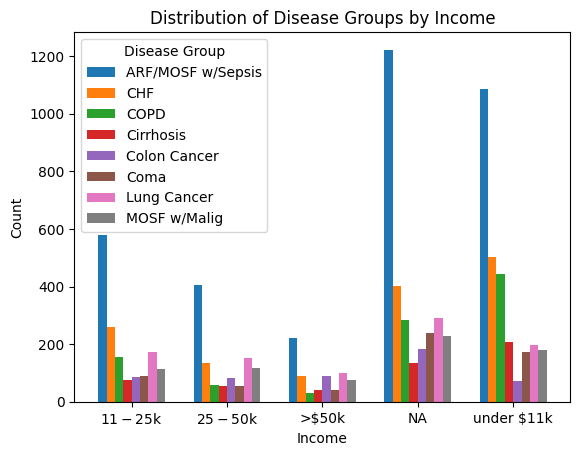

In [ ]:
# Create a contingency table
contingency_table_income = pd.crosstab(df['income'], df['dzgroup'])

# Print the contingency table
print("Contingency Table for Income and Disease Group:")
print(contingency_table_income)

# Perform the chi-square test
chi2_income, p_income, dof_income, expected_income = chi2_contingency(contingency_table_income)

# Display the results
print("\nChi-Square Statistic:", chi2_income)
print("Degrees of Freedom:", dof_income)
print("P-value:", p_income)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected_income, index=contingency_table_income.index, columns=contingency_table_income.columns))

# Interpret the results
alpha = 0.05
print("\nSignificance Level (α):", alpha)
print("\nHypotheses:")
print("H0: There is no significant association between income and dzgroup (They are independent).")
print("H1: There is a significant association between income and dzgroup (They are not independent).")

# Compare p-value to the significance level
if p_income < alpha:
    print("\nReject the null hypothesis. There is a significant association between income and dzgroup.")
else:
    print("\nFail to reject the null hypothesis. There is no significant association between income and dzgroup.")

# Plot a grouped bar chart for visualization
plt.figure(figsize=(12, 6))
contingency_table_income.plot(kind='bar', width=0.7, rot=0)

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Disease Groups by Income')

# Show the plot
plt.legend(title='Disease Group')
plt.show()

## Regression Analysis

### Age VS Death Probability

Learned Parameters:
[-0.22249113  0.14466017]


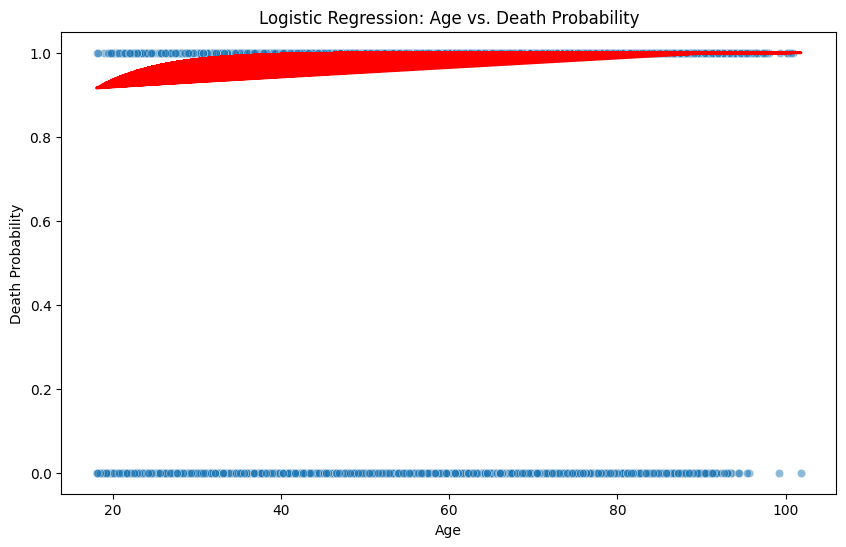

In [ ]:
# Selecting relevant columns
df_regression = df[['age', 'death']]

# Handling missing values if any
df_regression = df_regression.dropna()

# Extracting independent variable (X) and dependent variable (y)
X = df_regression['age']
y = df_regression['death']

# Adding a constant term to the independent variable for the intercept
X = np.c_[np.ones(X.shape[0]), X]

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
theta = np.zeros(X.shape[1])

# Define the hypothesis function
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

# Define the cost function (logistic loss)
def cost_function(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    return -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))

# Define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = hypothesis(X, theta)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)

    return theta, costs

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Perform gradient descent
theta, costs = gradient_descent(X, y, theta, learning_rate, iterations)

# Print the learned parameters
print("Learned Parameters:")
print(theta)

# Visualizing the logistic regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='death', data=df_regression, alpha=0.5)
plt.plot(df_regression['age'], sigmoid(np.dot(X, theta)), color='red', linewidth=2)
plt.title('Logistic Regression: Age vs. Death Probability')
plt.xlabel('Age')
plt.ylabel('Death Probability')
plt.show()

### Age VS Dementia

In [ ]:
df['dementia'].value_counts()

0    8807
1     296
Name: dementia, dtype: int64


Logistic Regression Summary:
Slope (Coefficient): 0.0022212689751383756
Intercept: -0.10664934651684346

Hypothesis Testing for 'age' coefficient:
P-value: 6.0208306452969e-79
Significance Level (alpha): 0.05

Reject the null hypothesis. The coefficient of 'age' is significantly different from zero, or in other words, the variable 'age' has a statistically significant impact on the dependent variable, dementia.


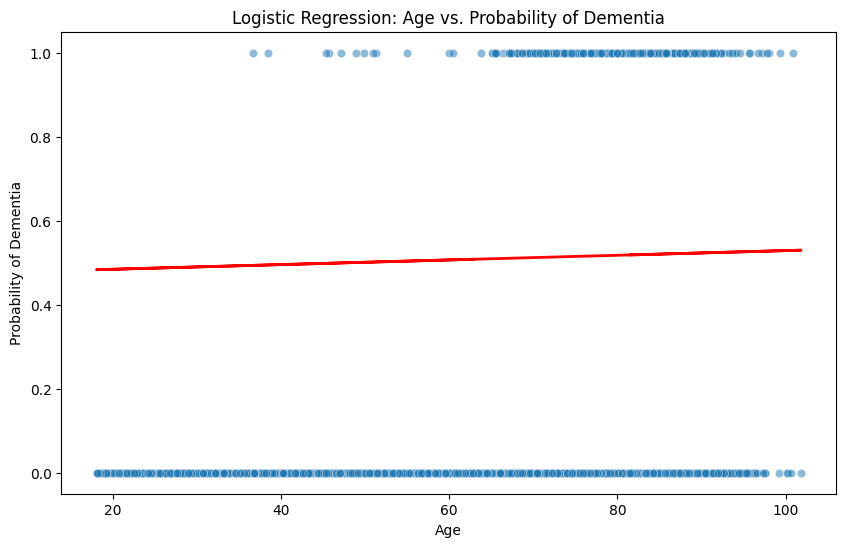

In [ ]:
# Selecting relevant columns
df_regression = df[['age', 'dementia']]

# Handling missing values if any
df_regression = df_regression.dropna()

# Extracting independent variable (X) and dependent variable (y)
X = df_regression['age']
y = df_regression['dementia']

# Adding a constant term to the independent variable for the intercept
X = np.column_stack((np.ones_like(X), X))

# Creating linear regression model
slope, intercept, _, _, _ = linregress(X[:, 1], y)

# Logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-(intercept + slope * x)))

# Print logistic regression summary
print("\nLogistic Regression Summary:")
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

# Hypothesis Testing
# Null Hypothesis (H0): The coefficient of 'age' is not significantly different from zero.
# Alternative Hypothesis (H1): The coefficient of 'age' is significantly different from zero.

# Extracting p-value for 'age' coefficient
p_value_age = linregress(X[:, 1], y)[3]

# Significance level (alpha)
alpha = 0.05

# Print the results of hypothesis testing
print(f"\nHypothesis Testing for 'age' coefficient:")
print(f"P-value: {p_value_age}")
print(f"Significance Level (alpha): {alpha}")

# Compare p-value to the significance level
if p_value_age < alpha:
    print("\nReject the null hypothesis. The coefficient of 'age' is significantly different from zero, or in other words, the variable 'age' has a statistically significant impact on the dependent variable, dementia.")
else:
    print("\nFail to reject the null hypothesis. The coefficient of 'age' is not significantly different from zero.")

# Predictions from the model (probability of dementia)
predictions_prob = logistic_function(X[:, 1])

# Converting probabilities to binary predictions (0 or 1)
predictions_binary = (predictions_prob >= 0.5).astype(int)

# Visualizing the logistic regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_regression['age'], y=y, alpha=0.5)
plt.plot(df_regression['age'], predictions_prob, color='red', linewidth=2)
plt.title('Logistic Regression: Age vs. Probability of Dementia')
plt.xlabel('Age')
plt.ylabel('Probability of Dementia')
plt.show()

#### Observation: In accordance with the dataset at hand, a discernible pattern becomes evident, indicating a marked exponential rise in the probability of dementia, particularly manifesting beyond the age threshold of 70.

## Demographic Analysis:

### 3.1 What is the distribution of age among the critically ill patients?

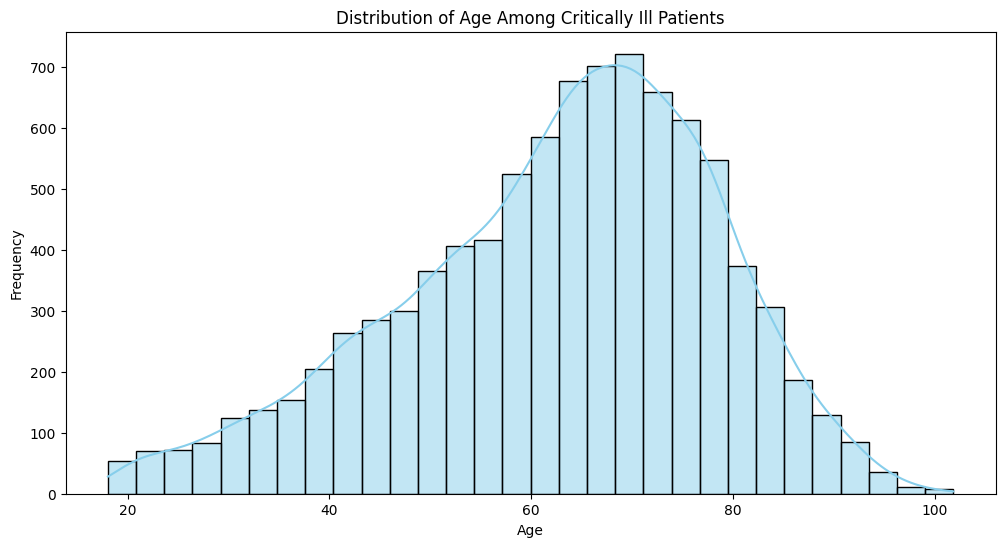

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age Among Critically Ill Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 3.2 How is the dataset distributed across different races and genders?

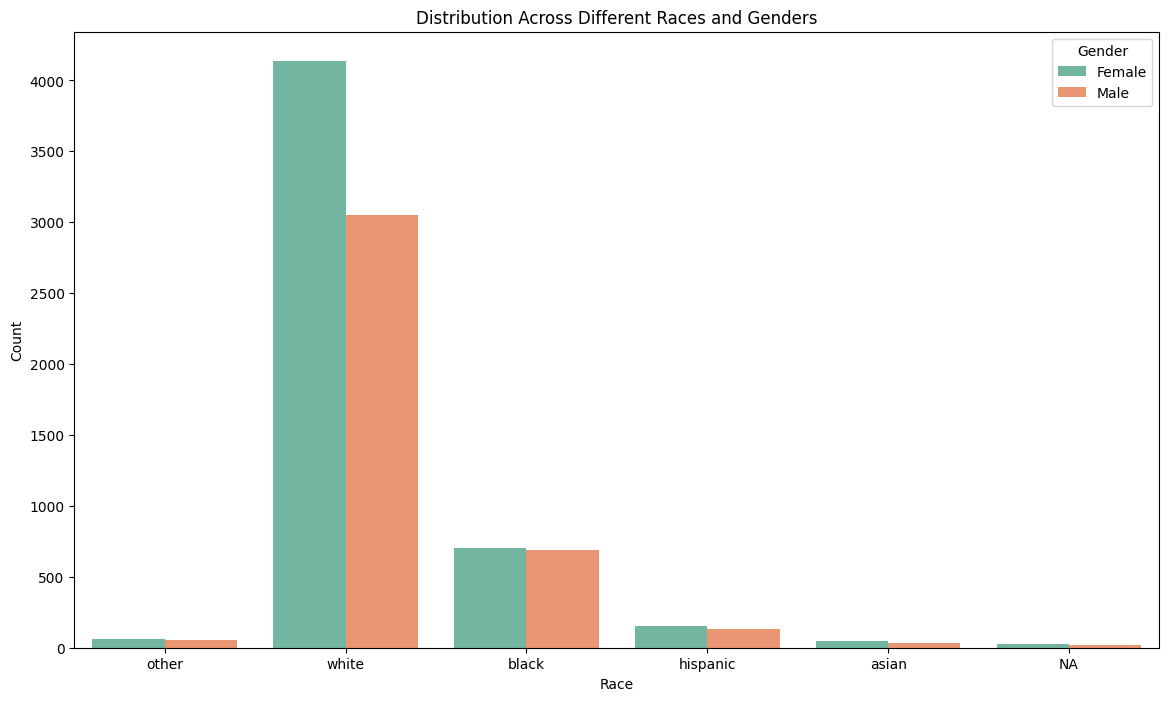

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='race', hue='sex', data=df, palette='Set2')
plt.title('Distribution Across Different Races and Genders')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()

## Disease Severity

### 4.1 Which disease categories (dzgroup and dzclass) are most prevalent in the dataset?

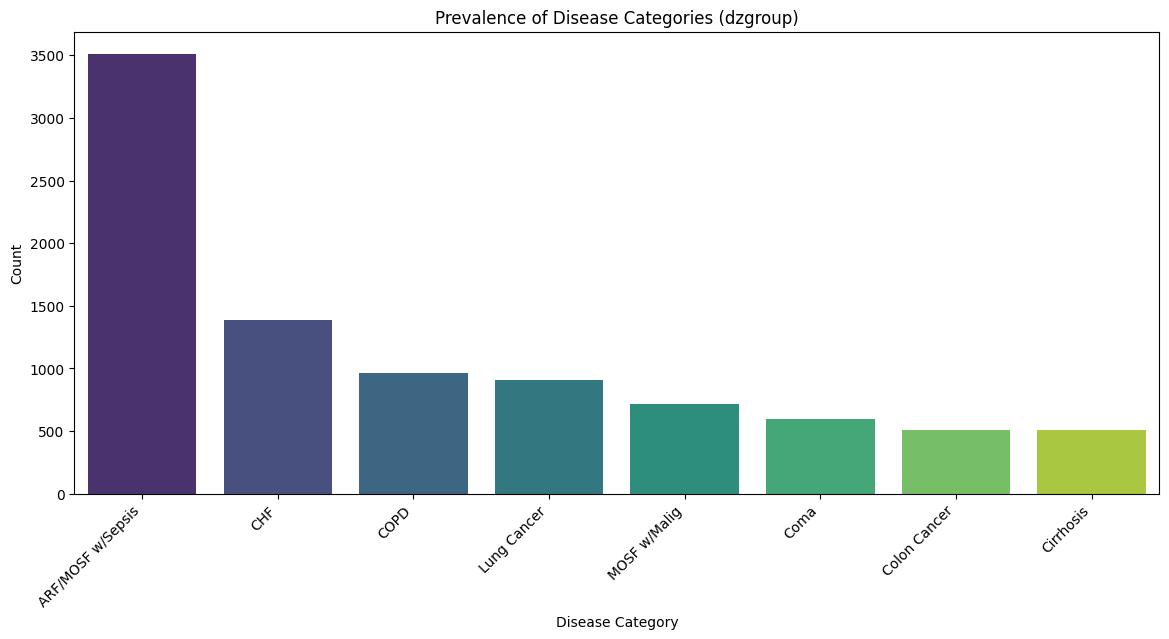

In [ ]:
# Prevalence of Disease Categories (dzgroup)
plt.figure(figsize=(14, 6))
sns.countplot(x='dzgroup', data=df, palette='viridis', order=df['dzgroup'].value_counts().index)
plt.title('Prevalence of Disease Categories (dzgroup)')
plt.xlabel('Disease Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

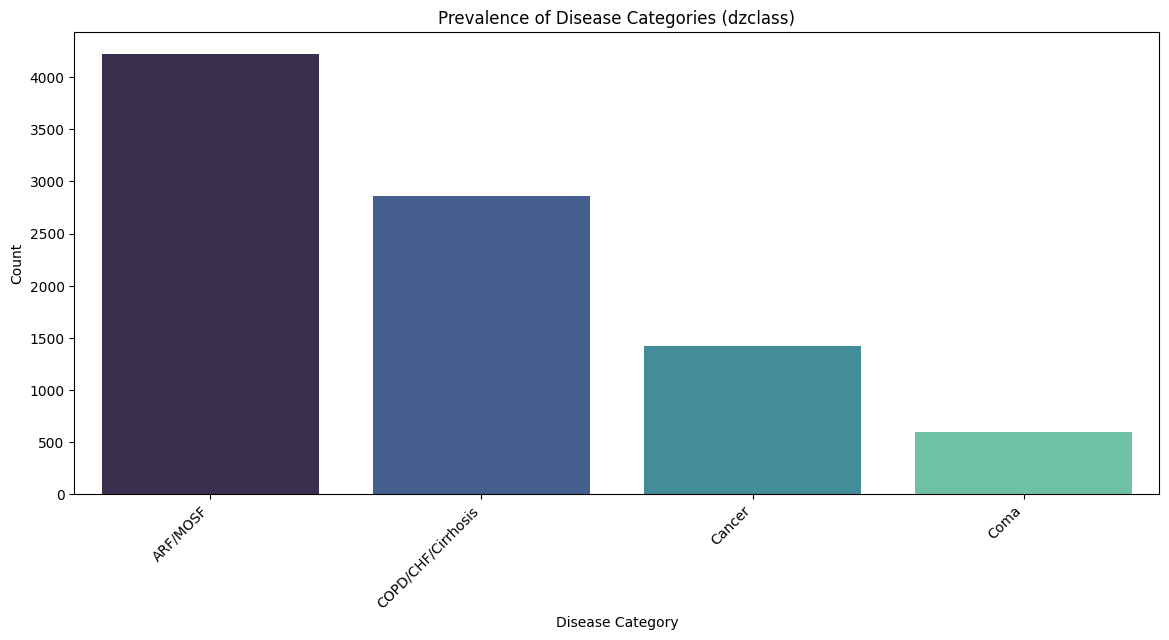

In [ ]:
# Prevalence of Disease Categories (dzclass)
plt.figure(figsize=(14, 6))
sns.countplot(x='dzclass', data=df, palette='mako', order=df['dzclass'].value_counts().index)
plt.title('Prevalence of Disease Categories (dzclass)')
plt.xlabel('Disease Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.2 Is there a correlation between the number of comorbidities (num.co) and disease severity?

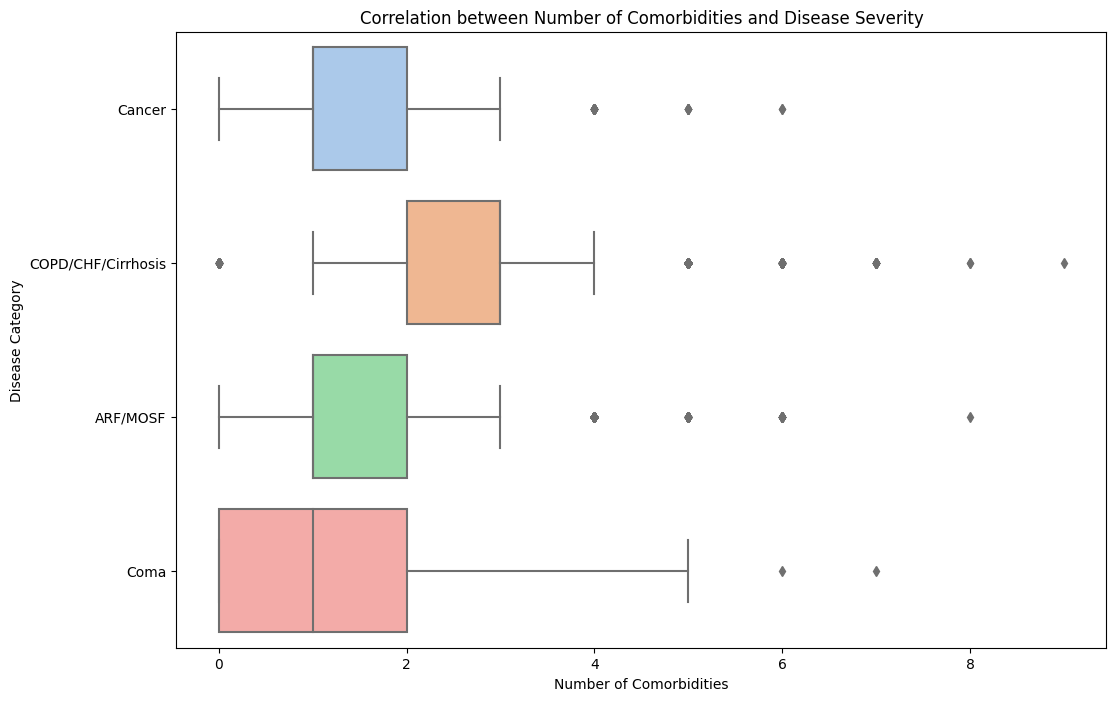

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='num.co', y='dzclass', data=df, palette='pastel')
plt.title('Correlation between Number of Comorbidities and Disease Severity')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Disease Category')
plt.show()

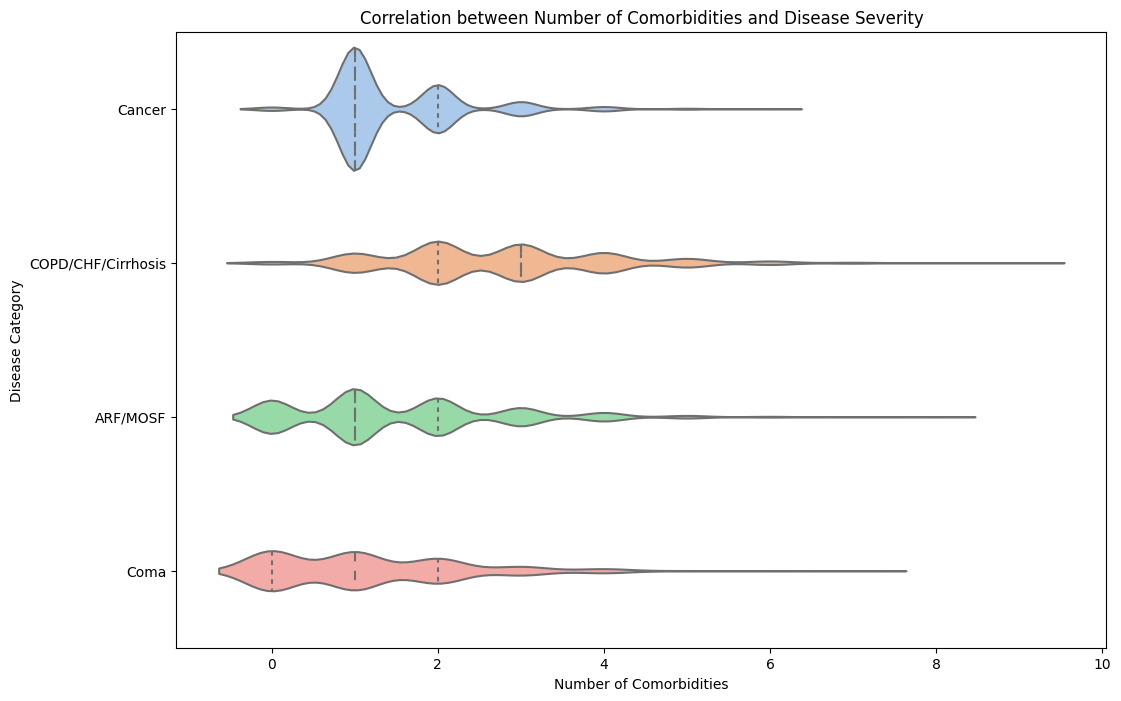

In [ ]:
# Violin plot for Correlation between Number of Comorbidities (num.co) and Disease Severity
plt.figure(figsize=(12, 8))
sns.violinplot(x='num.co', y='dzclass', data=df, palette='pastel', inner='quartile')
plt.title('Correlation between Number of Comorbidities and Disease Severity')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Disease Category')
plt.show()

## Survival Rates

### 5.1 What are the overall 2-month and 6-month survival rates in the dataset, and how do survival rates vary across different disease categories or demographic groups?

In [ ]:
# Overall 2-month and 6-month survival rates
overall_2m_survival_rate = df['surv2m'].mean() * 100
overall_6m_survival_rate = df['surv6m'].mean() * 100

print(f"Overall 2-month Survival Rate: {overall_2m_survival_rate:.2f}%")
print(f"Overall 6-month Survival Rate: {overall_6m_survival_rate:.2f}%")

Overall 2-month Survival Rate: 63.59%
Overall 6-month Survival Rate: 52.01%


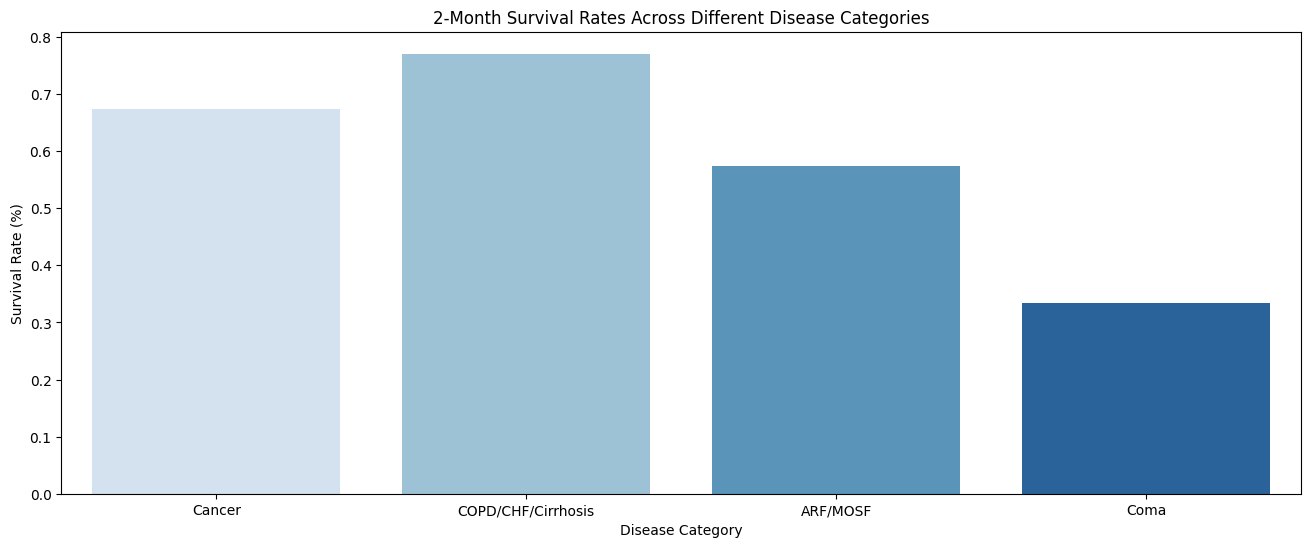

In [ ]:
# Visualize survival rates across different disease categories
plt.figure(figsize=(16, 6))
sns.barplot(x='dzclass', y='surv2m', data=df, ci=None, palette='Blues')
plt.title('2-Month Survival Rates Across Different Disease Categories')
plt.xlabel('Disease Category')
plt.ylabel('Survival Rate (%)')
plt.show()

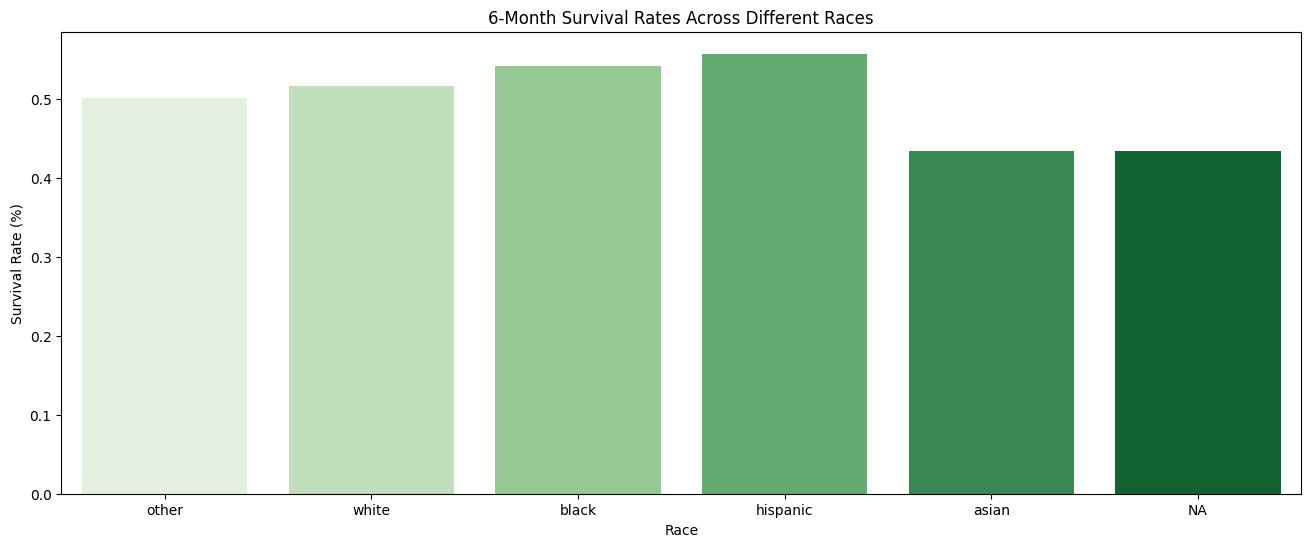

In [ ]:
# Visualize survival rates across different demographic groups
plt.figure(figsize=(16, 6))
sns.barplot(x='race', y='surv6m', data=df, ci=None, palette='Greens')
plt.title('6-Month Survival Rates Across Different Races')
plt.xlabel('Race')
plt.ylabel('Survival Rate (%)')
plt.show()

## Financial Impact:

### 6.1 How are charges and total costs (charges, totcst, totmcst) distributed across the dataset?

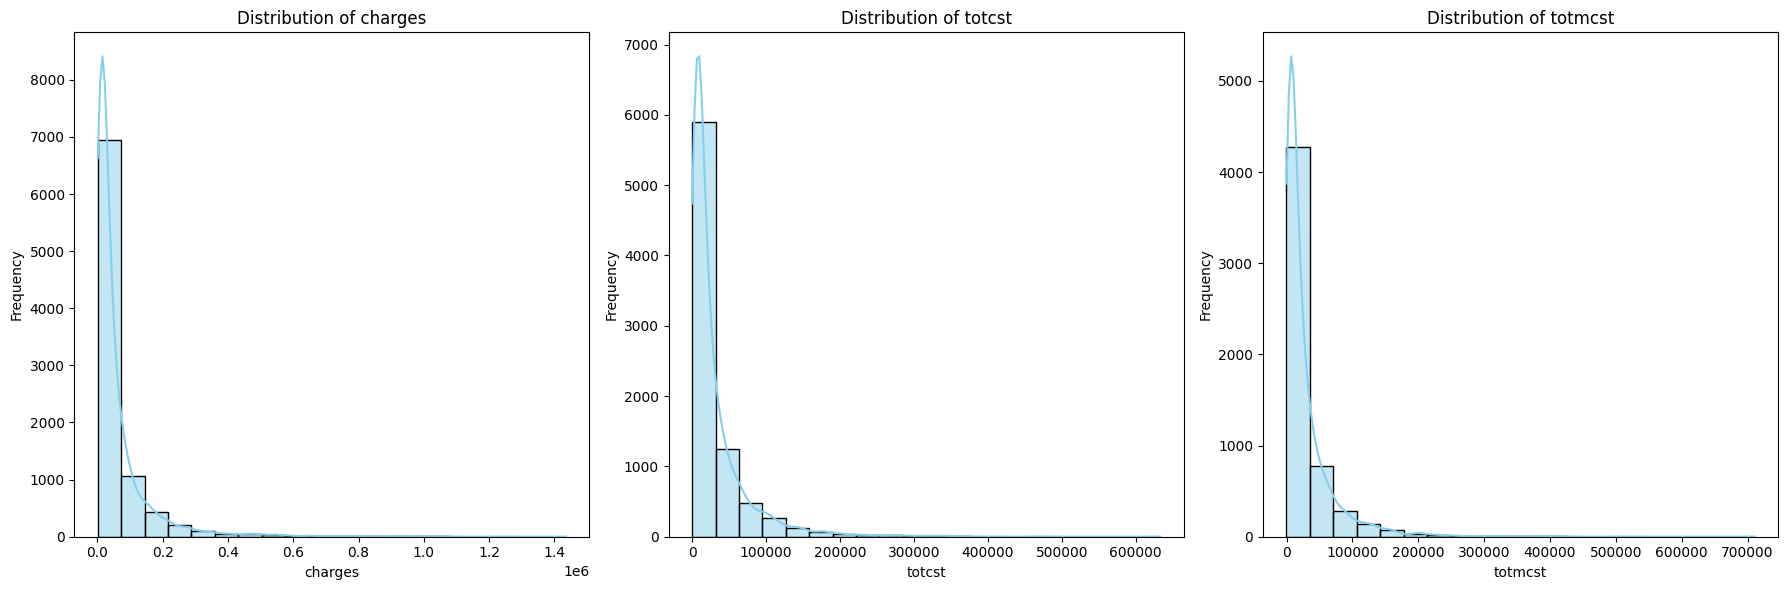

In [ ]:
# Financial Impact: Distribution of Charges and Total Costs
financial_variables = ['charges', 'totcst', 'totmcst']

# Distribution of Charges, Total Costs, and Total Micro Costs
plt.figure(figsize=(18, 6))
for i, variable in enumerate(financial_variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[variable], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

plt.tight_layout()

## Comorbidity Analysis:

### 7.1 How common are diabetes and dementia among the critically ill patients?

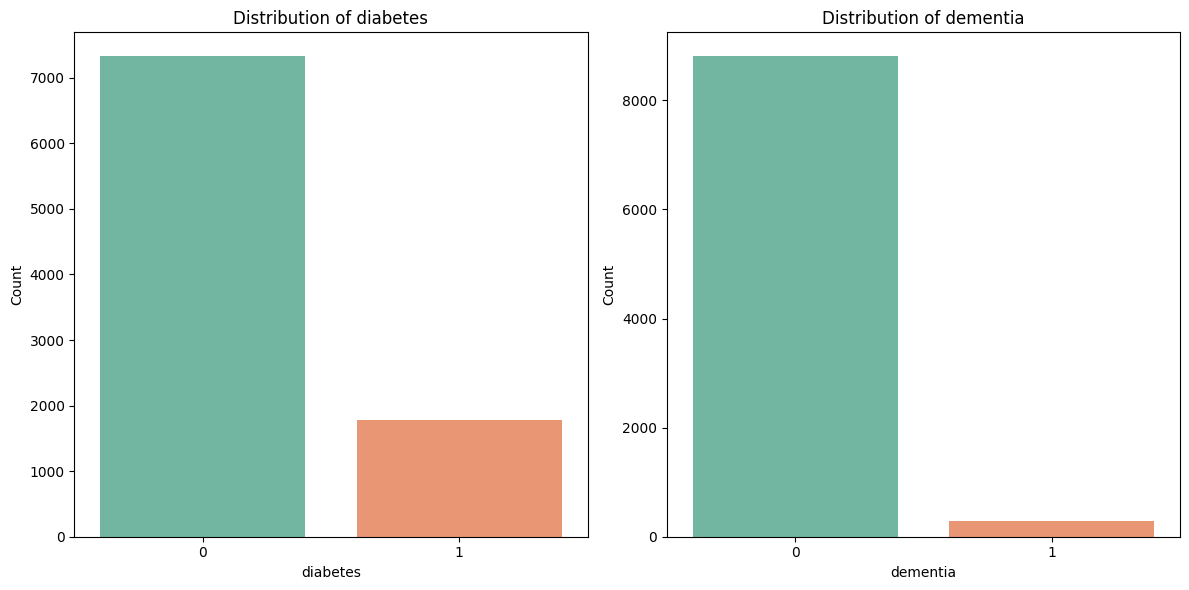

In [ ]:
# Comorbidity Analysis: Diabetes and Dementia
comorbidity_variables = ['diabetes', 'dementia']

# Countplot for Diabetes and Dementia
plt.figure(figsize=(12, 6))
for i, variable in enumerate(comorbidity_variables, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=variable, data=df, palette='Set2')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 7.2 Are there any associations between certain comorbidities (e.g., diabetes) and disease categories?

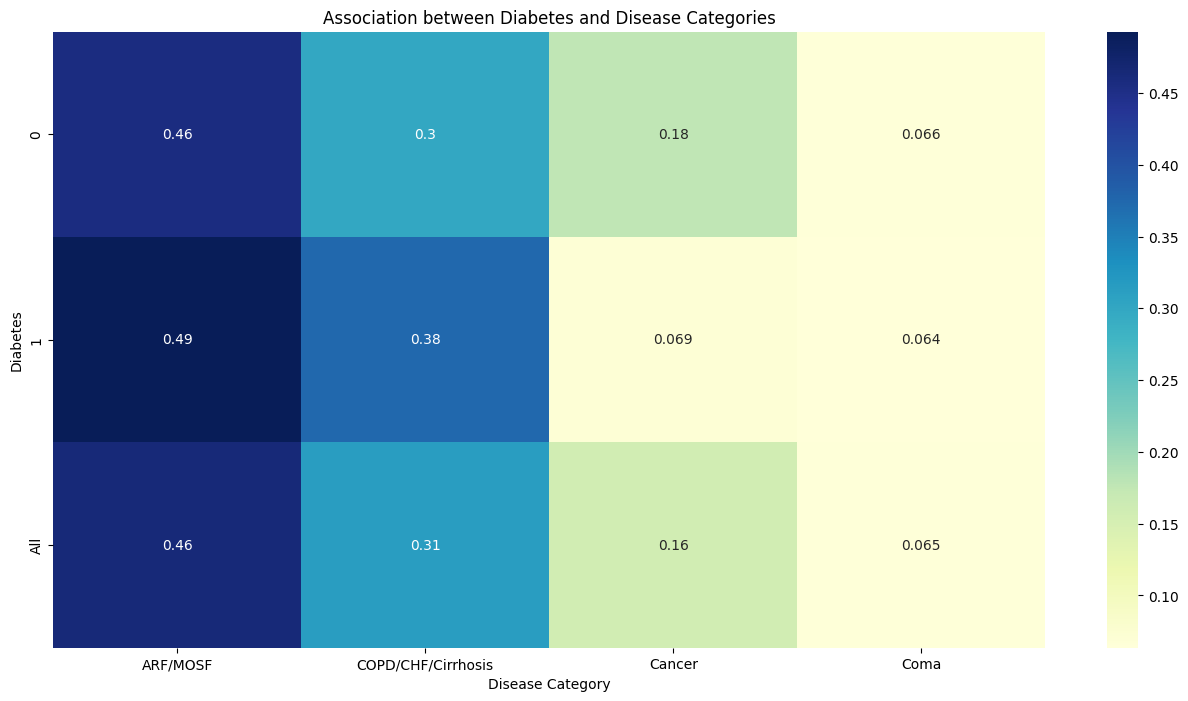

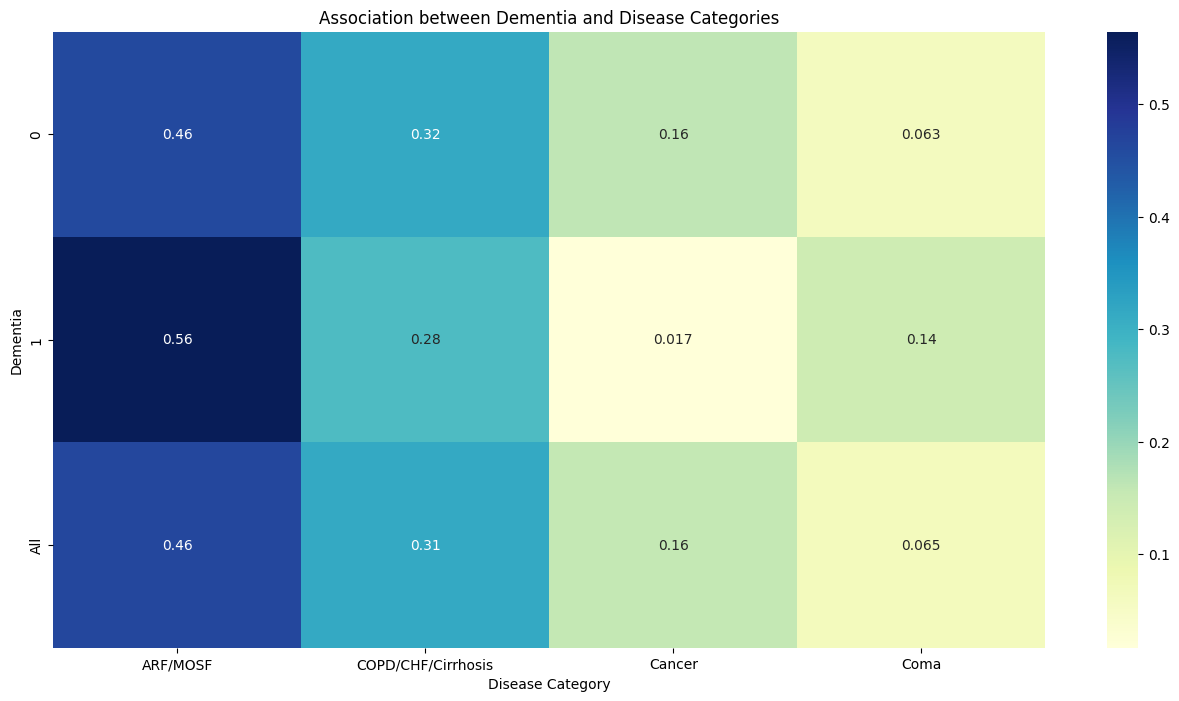

In [ ]:
# Association between Comorbidities and Disease Categories
plt.figure(figsize=(16, 8))
sns.heatmap(pd.crosstab(df['diabetes'], df['dzclass'], margins=True, normalize='index'), annot=True, cmap='YlGnBu')
plt.title('Association between Diabetes and Disease Categories')
plt.xlabel('Disease Category')
plt.ylabel('Diabetes')
plt.show()

plt.figure(figsize=(16, 8))
sns.heatmap(pd.crosstab(df['dementia'], df['dzclass'], margins=True, normalize='index'), annot=True, cmap='YlGnBu')
plt.title('Association between Dementia and Disease Categories')
plt.xlabel('Disease Category')
plt.ylabel('Dementia')
plt.show()

## Physiological Measures:

### 8.1 How are physiological measures (meanbp, wblc, hrt, resp, temp, pafi) distributed among patients?

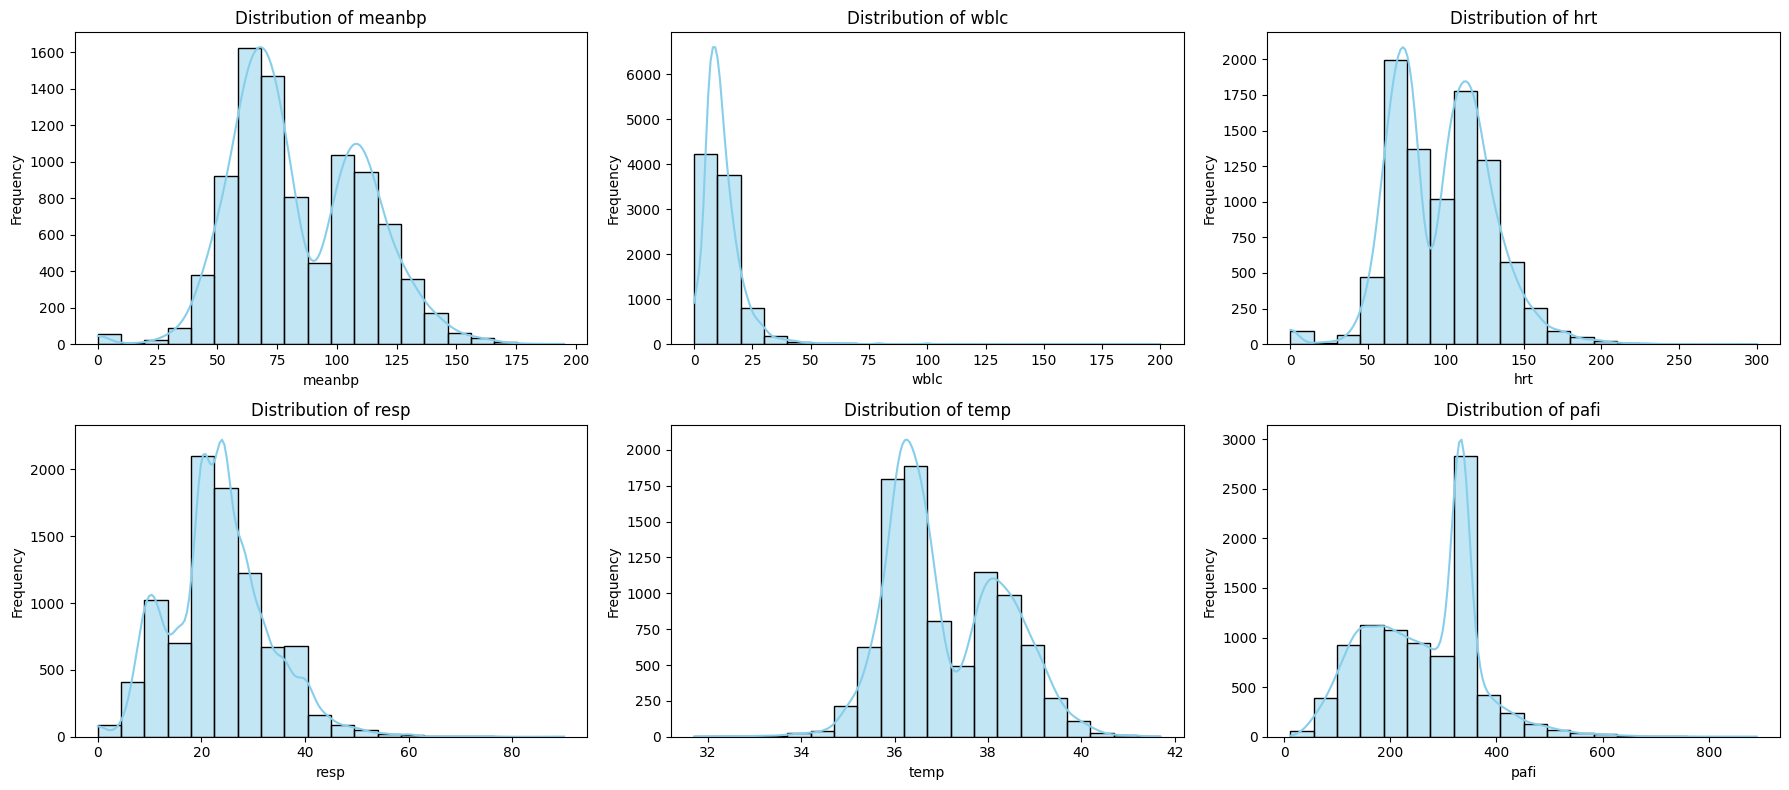

In [ ]:
# Physiological Measures Analysis
physiological_variables = ['meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi']

# Distribution of Physiological Measures
plt.figure(figsize=(18, 8))
for i, variable in enumerate(physiological_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[variable].dropna(), bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 8.2 Is there a correlation between physiological measures and survival rates?

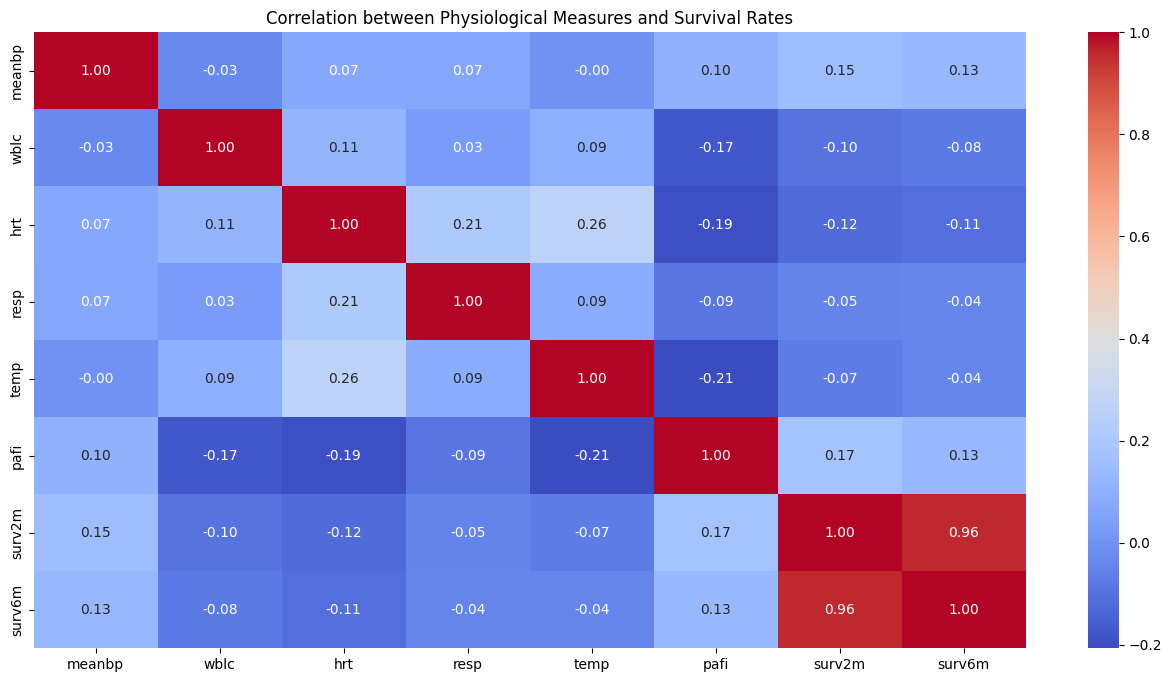

In [ ]:
# Correlation between Physiological Measures and Survival Rates
plt.figure(figsize=(16, 8))
physiological_survival_corr = df[physiological_variables + ['surv2m', 'surv6m']].corr()
sns.heatmap(physiological_survival_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Physiological Measures and Survival Rates')
plt.show()

## Impact of Education and Income

### 9.1 How is the distribution of education levels (edu) and income among the patients?

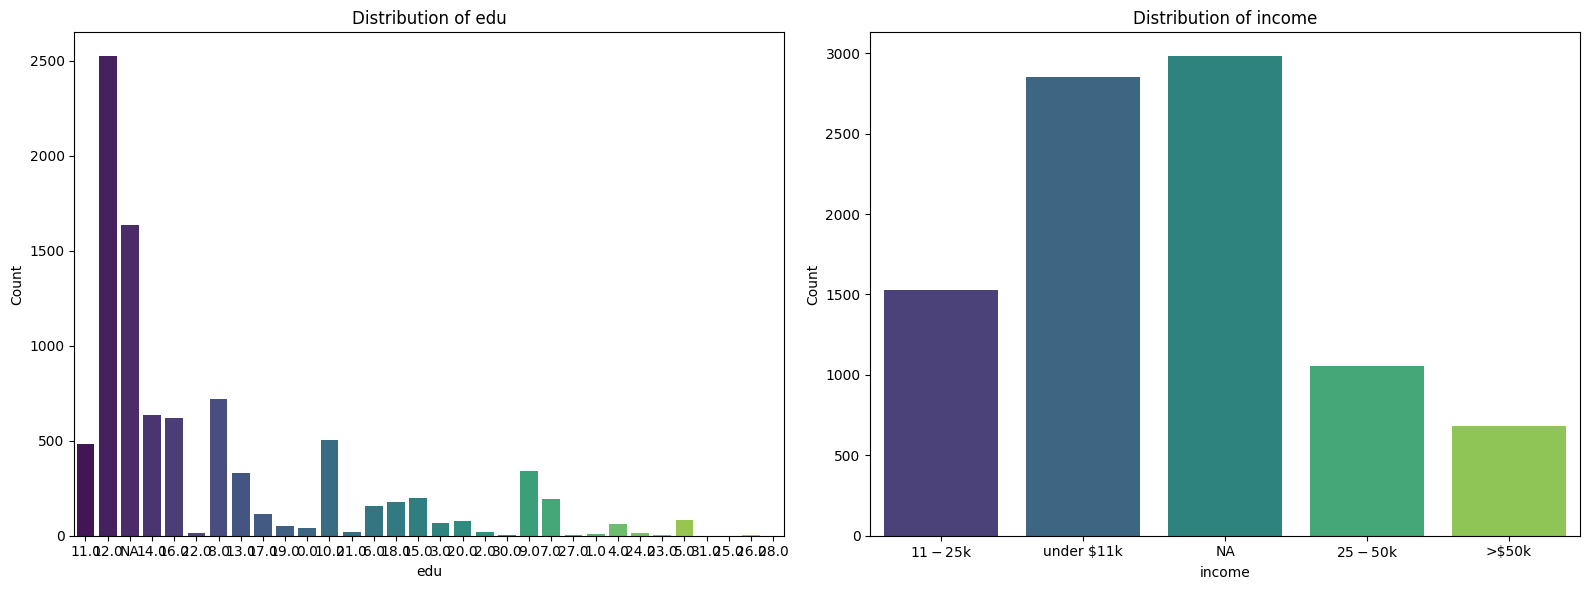

In [ ]:
# Impact of Education and Income Analysis
education_income_variables = ['edu', 'income']

# Distribution of Education Levels and Income
plt.figure(figsize=(16, 6))

for i, variable in enumerate(education_income_variables, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=variable, data=df, palette='viridis')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 9.2 Is there a relationship between education, income, and disease severity or survival rates?

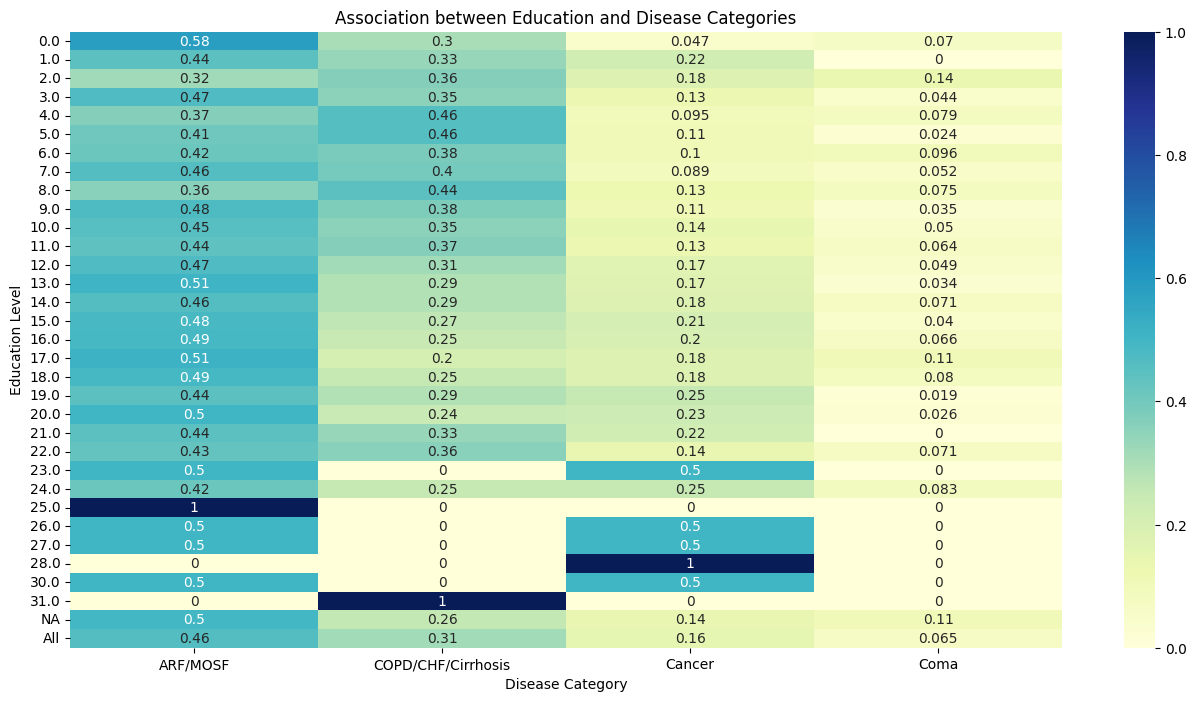

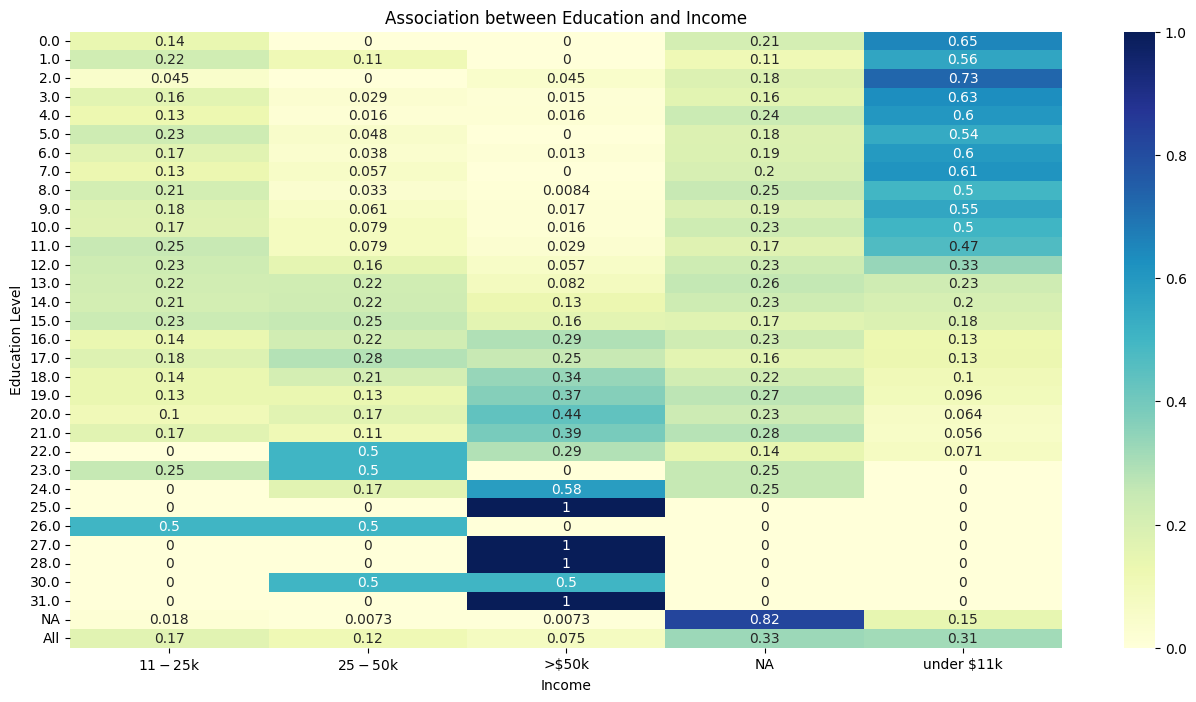

In [ ]:
# Relationship between Education, Income, and Disease Severity
plt.figure(figsize=(16, 8))
sns.heatmap(pd.crosstab(df['edu'], df['dzclass'], margins=True, normalize='index'), annot=True, cmap='YlGnBu')
plt.title('Association between Education and Disease Categories')
plt.xlabel('Disease Category')
plt.ylabel('Education Level')
plt.show()

# Relationship between Education, Income, and Survival Rates
plt.figure(figsize=(16, 8))
sns.heatmap(pd.crosstab(df['edu'], df['income'], margins=True, normalize='index'), annot=True, cmap='YlGnBu')
plt.title('Association between Education and Income')
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.show()

---
# **Conclusion**
---

## **General Observations:**

1. **Data Characteristics:**
   - The dataset has 10.78% missing values, impacting reliability.
   - Diverse variables (numerical and categorical) enable varied analyses.

2. **Numeric Data Analysis:**
   - Numeric variables show wide ranges, with outliers indicating potential extreme cases.
   - Categorical data highlights demographic and disease group trends.

3. **Distribution Analysis:**
   - Distributions reveal skewness, suggesting concentrated data points and potential outliers.
   - Clinical and cost-related features exhibit right skewness.

4. **Correlations and Relationships:**
   - Hospital mortality correlates with clinical scores (`avtisst`, `aps`, `sps`) and is inversely related to time until death.
   - Length of stay correlates positively with costs and clinical scores, indicating higher acuity for longer stays.

5. **Age Distribution by Categories:**
   - Disease classes and groups exhibit distinct age distributions, providing insights into patient demographics.

6. **Clinical Outcome Correlations:**
   - Disease groups impact hospital mortality, length of stay, and time until death.
   - Clinical scores correlate with mortality and time until death.

7. **Short Observations:**
   - Focus on data completeness, diversity, and potential biases.
   - Recognize the impact of outliers and skewness on analysis.
   - Correlate clinical variables for meaningful insights.
   - Consider demographic patterns in disease-related analyses.
   - Emphasize the relevance of clinical and cost-related features.

## **Observations on Racial Distribution:**

1. **Imbalance in Representation:**
   - The dataset predominantly consists of individuals classified as "white," with 7191 occurrences.
   - Other racial groups—such as "black" (1391), "hispanic" (290), "other" (112), and "asian" (79)—exhibit fewer occurrences.

2. **Potential Bias:**
   - The over-representation of the "white" category introduces a potential bias in the dataset.

3. **Impact on Chi-Square Test:**
   - In the chi-square test between 'race' and 'dzgroup,' the large number of "white" occurrences may influence statistical results. Interpretation should consider sample size imbalances among racial groups.

4. **Consideration for Subgroup Analysis:**
   - Research objectives may benefit from subgroup analyses or adjustments to address imbalances in racial representation, ensuring fair comparisons.

5. **Ethical Considerations:**
   - Unequal racial distribution prompts ethical considerations. Researchers should navigate potential impacts on result interpretation, especially concerning health disparities or outcomes across racial groups.

## **Income and Disease Group Association:**

- **Chi-Square Test Result:**
   - Reject the null hypothesis; there is a significant association between income and disease group.

- **Implications:**
   - The chi-square test underscores a meaningful connection between income and disease group, indicating potential disparities in disease prevalence across income categories.

- **Considerations:**
   - Further investigation into specific disease groups and income brackets can offer nuanced insights.
   - Policy implications may arise for addressing healthcare access and outcomes related to income disparities.

- **Actionable Insight:**
   - Understanding income's role in disease distribution allows for targeted interventions and tailored healthcare strategies for different socioeconomic groups.

## **Observations on Age Vs Death Probability:**
* **Stabilization of Death Probability with Age:**
  * The logistic regression curve indicates that the probability of death increases with age but appears to plateau as age approaches the higher end of the spectrum. Specifically, the probability of death becomes relatively constant for older age groups, suggesting that beyond a certain age, the incremental risk of death does not increase significantly with age.

* High Death Probability in Old Age:
  * The plot shows that the estimated death probability is very high for the older age groups, nearing certainty (probability of 1.0). This aligns with the expectation that the risk of death generally increases with age due to factors such as the higher likelihood of comorbidities, decreased physiological reserve, and the increased incidence of life-threatening illnesses in older populations.

## **Observations on Age Vs Dementia Probability:**
* **Constant Probability Across Age Groups:**
  * The logistic regression curve is relatively flat, indicating that, according to this model, the probability of developing dementia does not vary significantly with age. This suggests that within the population and age range studied, age alone is not a strong predictor of dementia, based on the data available and the model used.

* **Low Probability of Dementia Across All Ages:**
  * The plot shows that the estimated probability of dementia is consistently low across all age groups, hovering around the same low value well below 0.5. This implies that, for the sample represented, the overall risk of dementia remains constant and low throughout the age spectrum, as depicted by the model.

## **Observations on Age Vs Critically Ill Patients:**
* **Normal Distribution of Age:**
  * The age distribution among critically ill patients appears to be approximately normally distributed, with the highest frequency of patients centered around the middle age range. This suggests that middle-aged individuals constitute the largest proportion of critically ill patients within the sampled population.

* **Lesser Frequency of Young and Elderly Patients:**
  * The frequencies on the histogram taper off for both the younger and older age groups, indicating that there are fewer critically ill patients at the extremes of the age spectrum in the data sample. This could reflect a lower prevalence of critical illness among the very young and an underrepresentation of the elderly, or it could suggest age-related differences in the types of critical illness or healthcare utilization patterns.

## **Observations on Data Distribution based on Races and Genders:**
* **Predominance of Certain Racial Groups:**
  * The white racial group has the highest count among the categories presented, indicating that within this dataset, individuals identified as white constitute the largest proportion of the sample. This is followed by the black racial group, which has a notably lower count but is still significant.

* **Gender Distribution within Racial Groups:**
  * Across all racial groups, the count of females is consistently higher than that of males. This trend is especially pronounced in the white and black racial groups. The disparity suggests that in this dataset, more females than males are represented or have been sampled across these racial groups.

## **Observations on Severity of Diseases:**
* **Highest Prevalence of ARF/MOSF with Sepsis:**
  * Acute Renal Failure/Multiple Organ System Failure with Sepsis (ARF/MOSF w/Sepsis) is the most prevalent condition among the diseases displayed, indicating it is a common cause of critical illness within the observed cohort.

* **Lower Prevalence of Coma and Cirrhosis:**
  * Conditions such as coma and cirrhosis are less frequently represented in this patient population compared to other categories. This could suggest that while serious, they may be less commonly encountered in this specific healthcare setting or that they have a lower incidence rate among critically ill patients in the dataset.

## **Observations on Correlation between comorbidity and Disease Severity:**
* **Variation in Comorbidity Count Across Disease Categories:**
  * There is a noticeable variation in the median number of comorbidities across different disease categories. The 'Coma' category has the lowest median number of comorbidities, suggesting that patients in this group may have fewer concurrent illnesses. In contrast, categories like 'COPD/CHF/Cirrhosis' and 'ARF/MOSF' have higher median comorbidities, indicating that patients with these conditions tend to have multiple health issues simultaneously.

* **Presence of Outliers in Comorbidity Distribution:**
  * The boxplot for each disease category shows the presence of outliers, which are patients with a number of comorbidities that are significantly higher than the median. This suggests that within each disease category, there are individual patients who have a particularly high burden of concurrent illnesses, which could imply more complex medical needs and potential challenges in their management.

## **Observations to understand overall survival rates across diseases or demographics:**
* **Variation in Survival Rates by Disease:**
  * The survival rates differ significantly across disease categories. Patients with cancer have the highest 2-month survival rate, which is just over 70%. In contrast, patients in the coma category show the lowest survival rate, which appears to be around 30%. This suggests that prognosis varies widely depending on the disease category, with some conditions associated with a higher likelihood of short-term survival than others.

* **Comparatively Lower Survival for Critical Conditions:**
  * The conditions labeled as COPD/CHF/Cirrhosis and ARF/MOSF display intermediate survival rates between the higher rates seen in cancer patients and the lower rates associated with coma patients. This indicates that while these conditions are serious, patients with these diagnoses have a moderate likelihood of surviving at least two months following their critical illness.

## **Observations on Charges and Total Charges Distribution:**
* **Skewed Distribution:**
  * Medical cost-related histograms often exhibit a right-skewed distribution, meaning that a large number of patients incur lower costs, while fewer patients incur very high costs. This pattern suggests that while most patients may only require routine care, a small subset of patients likely utilizes more intensive, and consequently more expensive, medical resources.

* **Outliers Indicating Expensive Treatments:**
  * The presence of outliers, or individual data points that fall far from the general clustering of data, typically indicates patients who have undergone particularly expensive treatments. This could be due to complex surgeries, long-term hospital stays, intensive care, or the management of multiple comorbidities.

## **Observations on similarity between Dementia Vs Diabetes among Critically Ill Patients:**
* **Prevalence of Conditions:**
  * The charts likely show a higher count for non-affected individuals (represented by '0') compared to those affected by diabetes or dementia (represented by '1'). This indicates that within the population sampled, a larger portion of individuals does not have these conditions as opposed to those who do.

* **Comparison of Disease Incidence:**
  * If one condition shows a relatively taller bar for '1' than the other, it suggests a higher incidence of that particular condition in the population. For instance, if the bar for diabetes '1' is taller than that for dementia '1', it would imply that diabetes is more prevalent than dementia among the individuals represented in the data.

## **Observations on associations between certain comorbidities and disease categories**
* **Dementia Association with Disease Categories:**
  * Dementia appears to have varying levels of association with different disease categories. The strongest association is observed with the category 'Coma', indicating that dementia is more prevalent or more likely to co-occur among patients in this category. This could suggest that conditions leading to coma may also be related to or exacerbate dementia.

* **Diabetes Association with Disease Categories:**
  * Diabetes shows a different pattern of association with disease categories compared to dementia. The strongest associations are observed with 'COPD/CHF/Cirrhosis' and 'ARF/MOSF', suggesting a higher prevalence or likelihood of co-occurrence of diabetes in patients with these conditions. This could be due to shared risk factors like lifestyle or underlying metabolic processes that contribute to both chronic organ diseases and diabetes.

## **Observations on Physiological measures Distribution among patients:**
* **Central Tendencies and Variability:**
  * Histograms generally show the central tendency (such as the mean or median) and variability (spread) of data. If a histogram is bell-shaped and symmetrical, the clinical measurement in question is likely to have a normal distribution, with most values clustering around the mean. If the histogram is skewed to one side, it indicates that the data has a long tail in either the lower or higher range of values, which might suggest outliers or a non-uniform distribution.

* **Commonality of Measurement Values:**
  * The height of the bars in a histogram indicates the frequency of occurrence of values within specific ranges. A high peak suggests that a particular range of values is common among the patient population, while lower bars indicate less common values. For instance, if a histogram of body temperature shows a high peak around 37°C (98.6°F), it indicates that most patients have a temperature within the normal range.

## **Observations on correlation between physiological measures and survival rates:**
* **Strong Correlation Between Survival Rates:**
  * The survival rates at two months (surv2m) and six months (surv6m) are highly correlated with each other, as indicated by the correlation values close to 1. This suggests that if a patient survives the initial two months, there is a high likelihood they will also survive up to six months.

* **Low Correlation Between Physiological Measures and Survival Rates:**
  * The physiological measures such as mean blood pressure (meanbp), white blood cell count (wblc), heart rate (hrt), respiration rate (resp), temperature (temp), and the partial arterial oxygen to fractional inspired oxygen ratio (pafi) have low to moderate correlations with survival rates. This indicates that no single measure strongly predicts survival, suggesting the complexity of critical care where multiple factors may interact to influence patient outcomes.

## **Observations on distribution of education levels and income among the patients:**
* **Educational Attainment:**
  * The histogram for education may show that a majority of individuals have attained a certain level of education, with the highest frequency concentrated at specific educational years. If the distribution has a peak at lower years of education, it suggests that the population has, on average, lower educational attainment, whereas a peak at higher years would suggest a higher educational level.

* **Income Distribution:**
  * The income histogram likely depicts the number of individuals within certain income brackets. A higher frequency in lower income categories would indicate that a substantial portion of the population earns less, whereas higher bars in higher income categories would suggest greater affluence. The distribution might also reveal income inequality within the population if certain income brackets have significantly higher counts compared to others.

## **Observations on relationship between education, income, and disease severity or survival rates:**
* **Education and Income Correlation:**
  * The heatmap probably shows varying degrees of correlation coefficients between different levels of education and income brackets. Higher positive values indicate a stronger positive association, suggesting that higher educational attainment may correspond to higher income levels. Conversely, lower or negative values would indicate a weaker or inverse relationship.

* **Education Level and Disease Prevalence:**
  * The second heatmap likely reveals the relationship between education levels and the prevalence of certain diseases. This could show whether higher educational attainment is associated with lower prevalence rates for certain diseases, which might imply a link between education and health outcomes due to factors like health literacy and access to healthcare resources.